# Projet 6 : Analysez les ventes d'une librairie avec R ou Python

# Analyse des données

L'analyse des données pour ce projet compte 2 parties. 

La première partie est une analyse des différents indicateurs de vente :
- Le chiffre d'affaires (chiffres, indicateurs graphiques, évolution dans le temps, moyennes mobiles, analyse par catégorie, analyse de la périodicité)
- L'évolution du nombre d'achats
- Les produits (top, flop ventes, répartition par prix, répartition par catégorie, courbe de lorenz)
- Les clients (CA par client via une courbe de lorenz, répartition de l'âge)

La deuxième partie est une analyse des clients en ligne, dans laquelle on étudiera les liens entre plusieurs variables :
- Le genre du client et les catégories de livres achetés (Test du Chi2)
- L’âge des clients et le montant total des achats (coefficient de pearson, test de régression linéaire)
- L’âge des clients et la fréquence d’achat (coefficient de pearson, test de régression linéaire)
- L’âge des clients et la taille du panier moyen (coefficient de pearson, test de régression linéaire)
- L’âge des clients et et les catégories des livres achetés (ANOVA)

Pour chaque analyse bivariée, on analysera indépendamment chacune des variables et on validera les prérequis spécifiques à chacun des tests.

## Import des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import scipy.stats as st
import datetime as dt
import statsmodels.api as sm

import warnings

folder = 'D:/Data_Analyst_Projet/Projet 6/Donnees python/'

In [2]:
# affichage des nombres et décimales
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# on importe le fichier en prenant pour index les dates
df=pd.read_csv(folder+'global.csv', index_col='date', parse_dates=True)

# Partie 1 : Analyse des différents indicateurs de vente

## Analyse du Chiffre d'affaires

### Chiffre d'affaires par mois, par catégorie

In [4]:
# on pivote par catégorie pour comparer les chiffres d'affaires par catégories
pivot_categ=df.pivot_table(index='date', columns='categ', values='price', aggfunc='sum')
pivot_categ.loc[pivot_categ.sort_index().index, [0, 1, 2]].resample('M').sum()

categ,0,1,2
date,,,
2021-03-31,"193,724.93","186,974.17","101,837.27"
2021-04-30,"205,371.42","156,138.35","114,748.49"
2021-05-31,"196,271.84","165,893.40","130,863.35"
2021-06-30,"168,017.63","189,162.04","126,983.37"
2021-07-31,"144,793.35","188,523.27","149,561.34"
2021-08-31,"167,833.38","162,991.38","151,555.79"
2021-09-30,"246,481.59","190,613.78","70,272.99"
2021-10-31,"199,325.31","33,762.32","87,785.59"
2021-11-30,"156,015.96","252,910.39","107,347.78"


In [5]:
# liste des mois
mois = df.sort_values('mois')['mois'].unique()

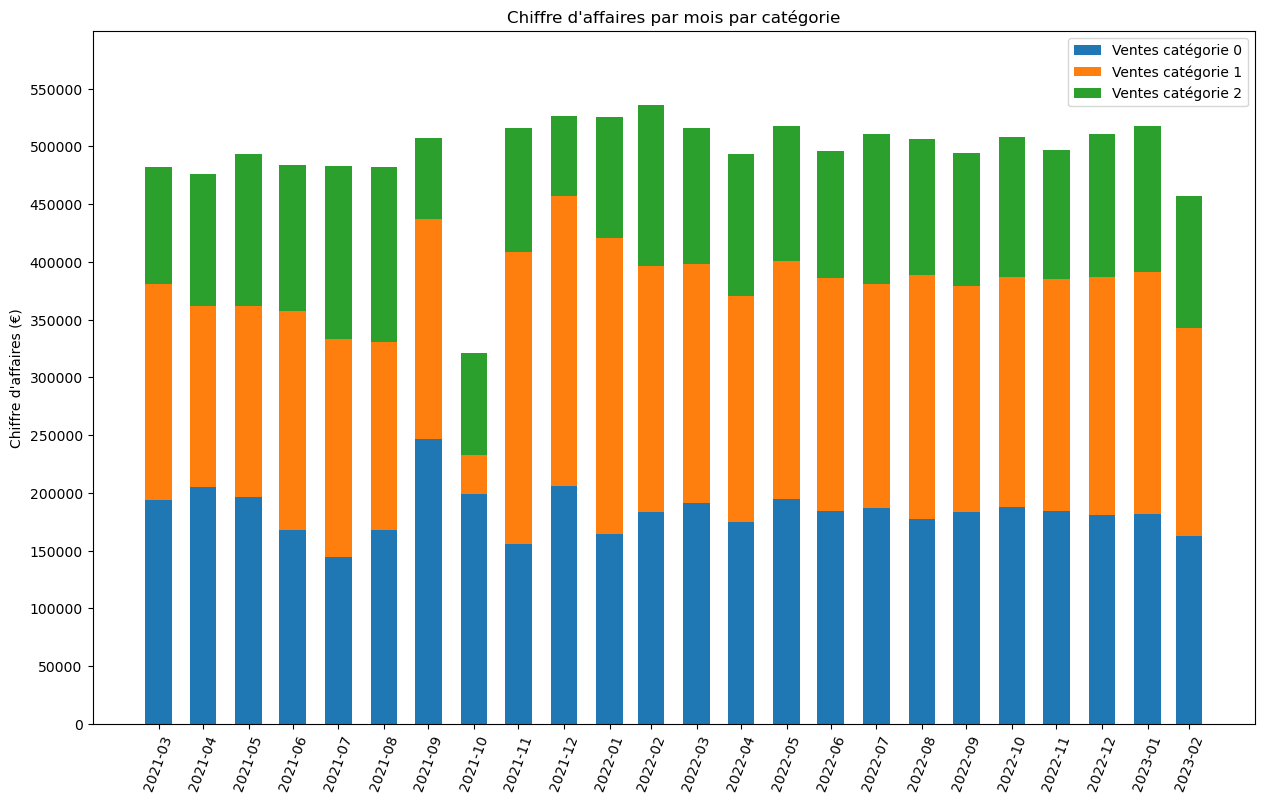

In [6]:
data=df.loc[df.sort_index().index,'price'].resample('M').sum()
data2=pivot_categ.loc[pivot_categ.sort_index().index, [0, 1, 2]].resample('M').sum()

plt.figure(figsize=(15,9))

plt.ylim(0,600000)
plt.yticks(np.arange(0, 600000, 50000))
plt.xticks(data2.index, mois, rotation=70)

plt.title("Chiffre d'affaires par mois par catégorie")

plt.bar(x=data2.index, height=data2[0], width=18, label='Ventes catégorie 0')
plt.bar(x=data2.index, height=data2[1], bottom=data2[0], width=18, label='Ventes catégorie 1')
plt.bar(x=data2.index, height=data2[2], bottom=data2[0]+data2[1], width=18, label='Ventes catégorie 2')

plt.ylabel("Chiffre d'affaires (€)")

plt.legend()

plt.show()

Les chiffre d'affaires par mois est assez réguliers, **entre 450 000 et 540 000 €** mise à part une chute du CA en octobre 2021.

Il y a une tendance à la hausse de mars 2021 à décembre 2021 puis une légère tendance à la baisse jusqu'a février 2023 malgré 2 bons mois en décembre et janvier dernier.

On voit que la chute du chiffre d'affaires d'octobre 2021 semble concerner uniquement la catégorie 1. Cela s'explique par une perte des données de la catégorie 1 pour le mois d'octobre.

#### Imputation par la moyenne des autres mois de la catégorie 1 pour octobre 2021

In [7]:
# moyenne mensuelle du CA de la catégorie 1
moyenne_mensuelle_ca_categ_1 = data2[~(data2.index=='2021-10-31')][1].mean()
moyenne_mensuelle_ca_categ_1

# df ou l'on ca imputer la moyenne au mois d'octobre 2021
ca_mois_imput = data2.copy()

# imputation de la moyenne de la catégorie 1 au mois d'octobre 2021
ca_mois_imput.loc['2021-10-31', 1]=round(moyenne_mensuelle_ca_categ_1, 2)

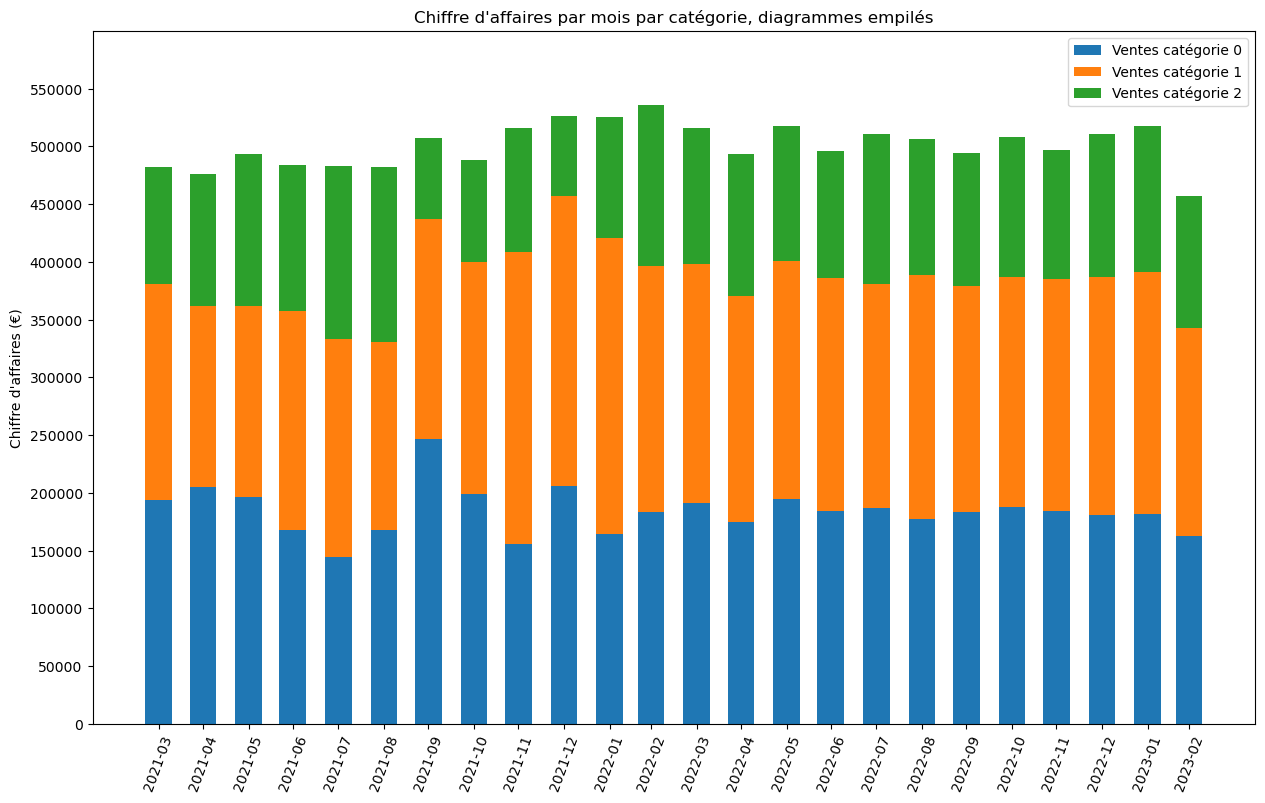

In [8]:
# Visualisation avec l'imputation

plt.figure(figsize=(15,9))

plt.ylim(0,600000)
plt.yticks(np.arange(0, 600000, 50000))
plt.xticks(ca_mois_imput.index, mois, rotation=70)

plt.title("Chiffre d'affaires par mois par catégorie, diagrammes empilés")

plt.bar(x=ca_mois_imput.index, height=ca_mois_imput[0], width=18, label='Ventes catégorie 0')
plt.bar(x=ca_mois_imput.index, height=ca_mois_imput[1], bottom=ca_mois_imput[0], width=18, label='Ventes catégorie 1')
plt.bar(x=ca_mois_imput.index, height=ca_mois_imput[2], bottom=ca_mois_imput[0]+ca_mois_imput[1], width=18, label='Ventes catégorie 2')

plt.ylabel("Chiffre d'affaires (€)")

plt.legend()

plt.show()

Voici l'évolution du chiffre d'affaires par mois avec l'imputation de la moyenne du chiffre d'affaires par mois pour les livres de la catégorie 1. L'ensemble des données est plus cohérente.

### Moyenne mobile

Définition : 

**La moyenne mobile est une méthode utilisée en statistiques pour lisser une série de données en éliminant les fluctuations aléatoires ou à court terme.**

**Ici, on calculera les moyennes mobiles sur 3 mois, 5 mois et on calculera la moyenne mobile exponentielle.**

Elle repose sur le même principe que la moyenne mobile mais qui donne plus de poids aux données les plus récentes.

#### Moyenne mobile par mois

In [9]:
# df mois imputé total
ca_mois_imput_tot = ca_mois_imput.sum(axis=1)
ca_mois_imput_tot = pd.DataFrame(ca_mois_imput_tot)
ca_mois_imput_tot=ca_mois_imput_tot.rename(columns={0:'price'})

# moyenne mobile sur 3 mois
ca_mois_imput_tot['price_rolling_average_3'] = ca_mois_imput_tot['price'].rolling(3).mean()

# moyenne mobile sur 5 mois
ca_mois_imput_tot['price_rolling_average_5'] = ca_mois_imput_tot['price'].rolling(5).mean()

# moyenne mobile exponentielle
ca_mois_imput_tot['price_rolling_average_exp'] = ca_mois_imput_tot['price'].ewm(alpha=0.6).mean()

ca_mois_imput_tot.head()

,price,price_rolling_average_3,price_rolling_average_5,price_rolling_average_exp
date,,,,
2021-03-31,"482,536.37",NaN,NaN,"482,536.37"
2021-04-30,"476,258.26",NaN,NaN,"478,052.01"
2021-05-31,"493,028.59","483,941.07",NaN,"487,652.38"
2021-06-30,"484,163.04","484,483.30",NaN,"485,503.77"
2021-07-31,"482,877.96","486,689.86","483,772.84","483,911.98"


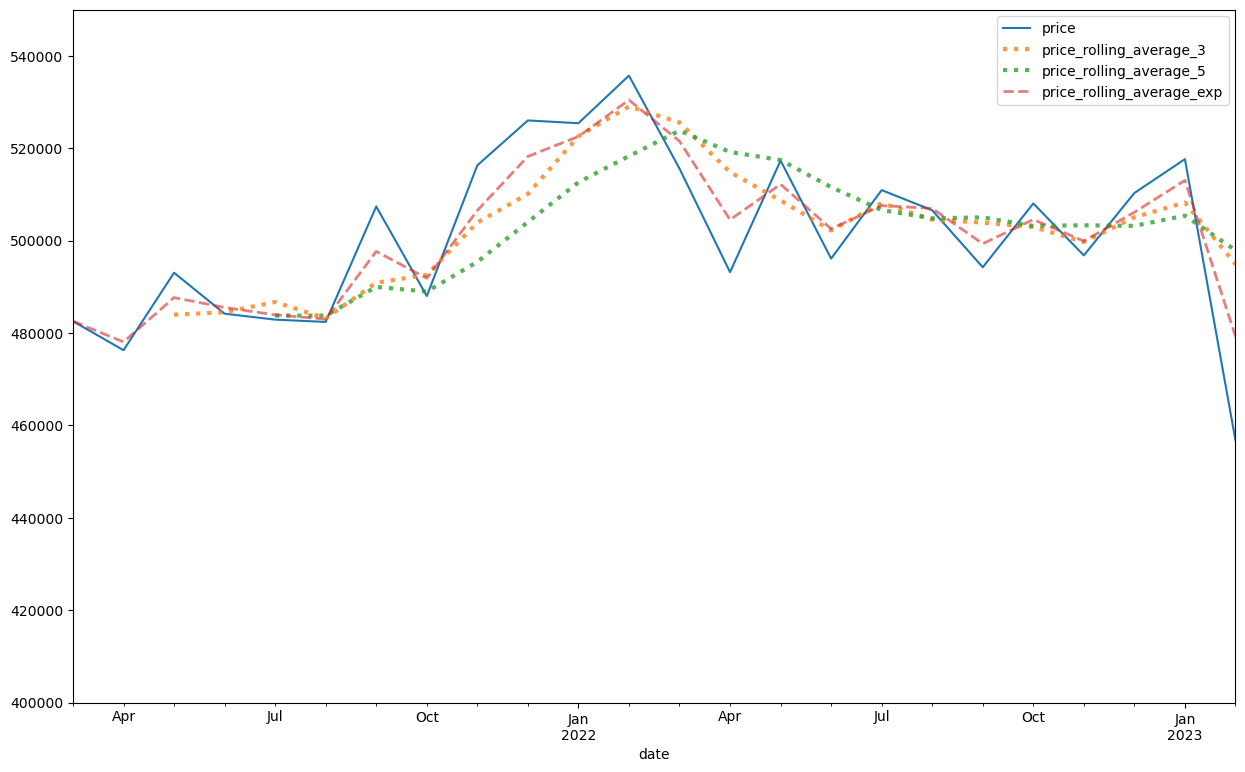

In [10]:
plt.figure(figsize=(15,9))

plt.ylim(400000, 550000, 50000)

ca_mois_imput_tot['price'].plot()
ca_mois_imput_tot['price_rolling_average_3'].plot(lw=3, ls=':', alpha=0.8)
ca_mois_imput_tot['price_rolling_average_5'].plot(lw=3, ls=':', alpha=0.8)
ca_mois_imput_tot['price_rolling_average_exp'].plot(lw=2, ls='--', alpha=0.6)

plt.legend()

plt.show()

Les moyennes mobiles montrent que la tendance était légèrement à la hausse jusqu'à février 2022 et qu'elle est à la baisse jusqu'à aujourd'hui.

#### Moyenne mobile par jours

In [11]:
# moyenne journalière categorie 1 2022
moy_jour_2022_categ1=df.loc[df['categ']==1, ['price']].loc['2022', ['price']].resample('D').sum().mean()[0]


# imputation de la moyenne journalière de la catégorie 1 pour les jours où les données sont manquantes
ca_jour = df.loc[df.sort_index().index,['price']].resample('D').sum()
ca_jour.loc['2021-10-02':'2021-10-27', 'price']=ca_jour.loc['2021-10-02':'2021-10-27', 'price']+moy_jour_2022_categ1

In [12]:
# moyenne mobile sur 7 jours
ca_jour['price_rolling_average_7'] = ca_jour['price'].rolling(7).mean()

# moyenne mobile sur 14 jours
ca_jour['price_rolling_average_14'] = ca_jour['price'].rolling(30).mean()

# moyenne mobile exponentielle
ca_jour['price_rolling_average_exp'] = ca_jour['price'].ewm(alpha=0.6).mean()

ca_jour.head()

,price,price_rolling_average_7,price_rolling_average_14,price_rolling_average_exp
date,,,,
2021-03-01,"16,575.86",NaN,NaN,"16,575.86"
2021-03-02,"15,497.09",NaN,NaN,"15,805.31"
2021-03-03,"15,198.69",NaN,NaN,"15,416.45"
2021-03-04,"15,196.07",NaN,NaN,"15,280.75"
2021-03-05,"17,471.37",NaN,NaN,"16,608.72"


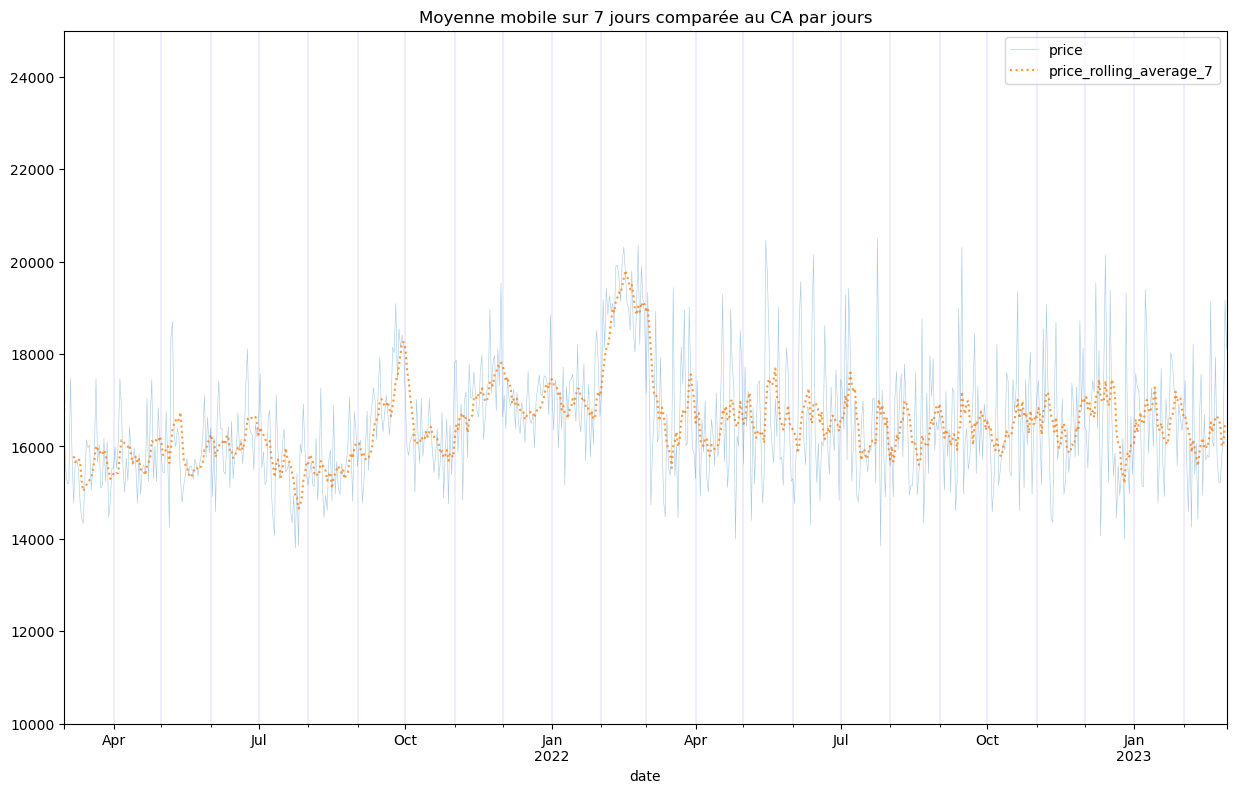

In [13]:
plt.figure(figsize=(15,9))

plt.ylim(10000, 25000, 2000)

plt.title("Moyenne mobile sur 7 jours comparée au CA par jours")
ca_jour['price'].plot(lw=0.4, alpha=0.4)
ca_jour['price_rolling_average_7'].plot(lw=1.5, ls=':', alpha=0.8)
#ca_jour['price_rolling_average_14'].plot(lw=1, ls=':', alpha=0.8)
#ca_jour['price_rolling_average_exp'].plot(lw=1, ls='--', alpha=0.6)

for m in mois :
    plt.axvline(m, linewidth=0.1, color='blue')

plt.legend()

plt.show()

On peut voir une grande variabilité entre les jours mais pas de saisonnalité visible.

## Analyse des Produits

In [14]:
df2 = df.reset_index(drop=True)
df2.head()

,id_prod,session_id,client_id,mois,price,categ,sex,birth,age
0,0_1518,s_211425,c_103,2022-05,4.18,0,f,1986,37
1,1_251,s_158752,c_8534,2022-02,15.99,1,m,1988,35
2,0_1277,s_225667,c_6714,2022-06,7.99,0,f,1968,55
3,2_209,s_52962,c_6941,2021-06,69.99,2,m,2000,23
4,0_1509,s_325227,c_4232,2023-01,4.99,0,m,1980,43


In [15]:
# Agrégation par produit avec l'argent qu'il a rapporté et son nombre de ventes
produit=df2.groupby('id_prod')['price'].agg(['sum', 'count']).reset_index()

# ajout price
produit['price']=produit['sum']/produit['count']

# on récupère la catégorie grâce au premier caractère de id_prod
produit['categ']=produit['id_prod'].apply(lambda x : x[0])

produit['categ']=produit['categ'].astype('category')

### Top produits

#### Top 20 des produits qui ont rapporté le plus

In [16]:
# Top 20 des produits qui ont rapporté le plus
produit.sort_values('sum', ascending=False).head(20)

,id_prod,sum,count,price,categ
3097,2_159,"94,893.50",650,145.99,2
3071,2_135,"69,334.95",1005,68.99,2
3046,2_112,"65,407.76",968,67.57,2
3035,2_102,"60,736.78",1027,59.14,2
3153,2_209,"56,971.86",814,69.99,2
2620,1_395,"54,356.25",1875,28.99,1
2592,1_369,"54,025.48",2252,23.99,1
3044,2_110,"53,846.25",865,62.25,2
3202,2_39,"53,060.85",915,57.99,2
3105,2_166,"52,449.12",228,230.04,2


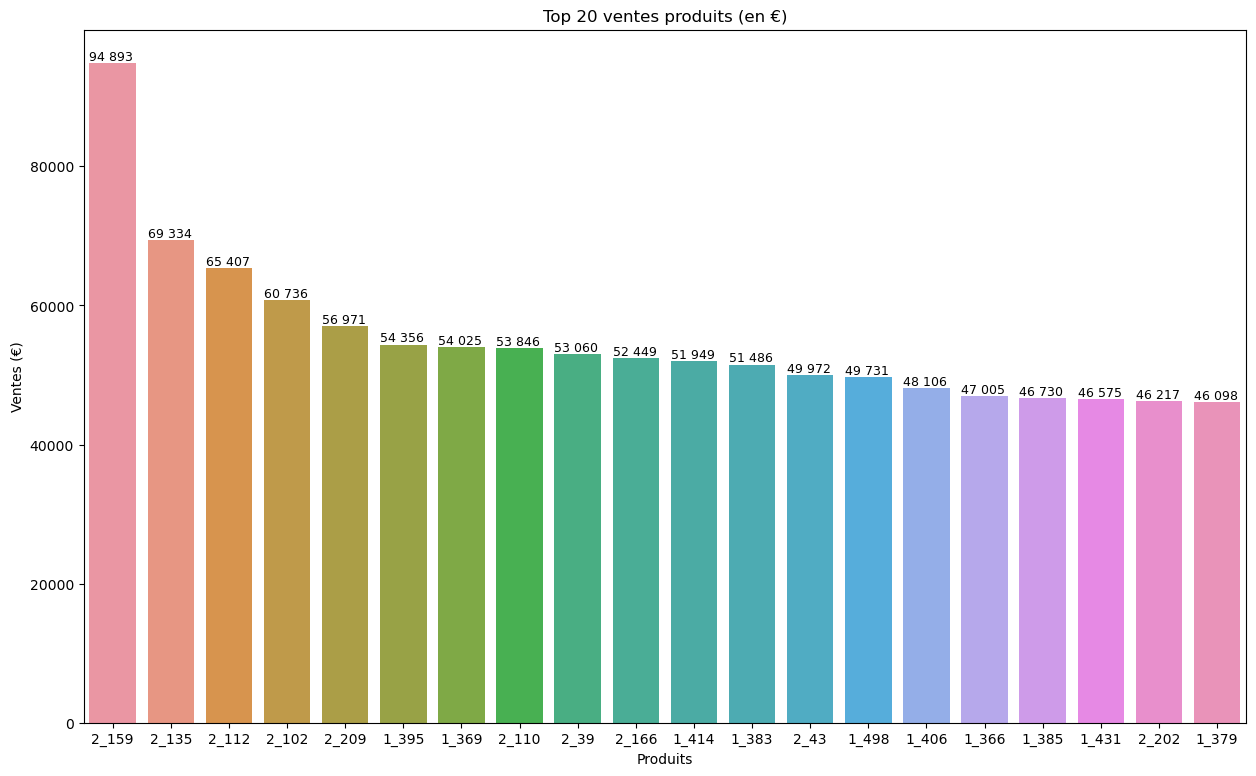

In [17]:
plt.figure(figsize=(15,9))

top20_ca=produit.sort_values('sum', ascending=False).head(20)
sns.barplot(x=top20_ca['id_prod'], y=top20_ca['sum'])

plt.title('Top 20 ventes produits (en €)')

plt.ylabel("Ventes (€)")
plt.xlabel("Produits")

for i in range(len(top20_ca)):
    plt.text(i-0.4, top20_ca.iloc[i,1] + 4e2, 
             '{:,}'.format(int(top20_ca.iloc[i,1])).replace(',',' '), fontsize=9)

plt.show()

Parmis les **20 produits (sur 3266)** qui rapportent la part la plus importante du chiffre d'affaires, 10 appartiennent à la catégorie 1 et 10 appartiennent à la catégorie 2.

A eux seuls, ces **20 livres rapportent 9.27%** du chiffre d'affaires.

### Flop Produits

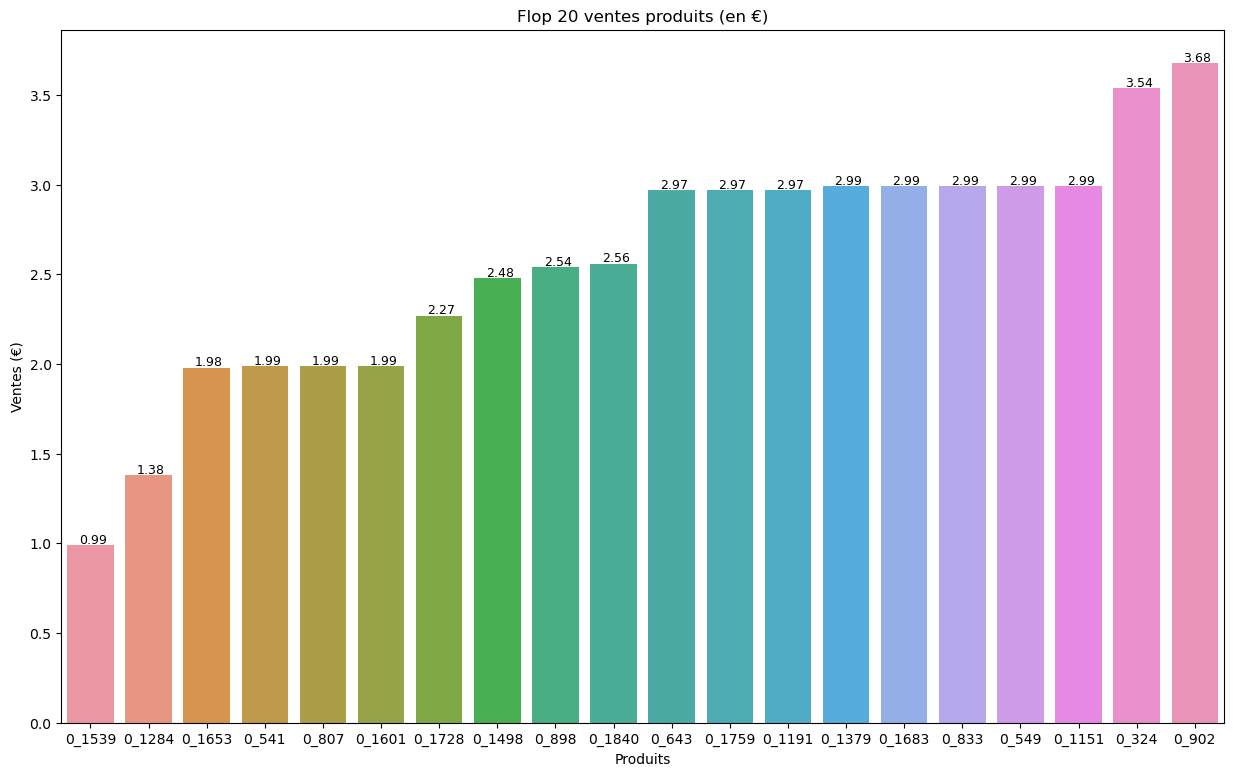

In [18]:
plt.figure(figsize=(15,9))

flop20_ca=produit.sort_values('sum').head(20)
sns.barplot(x=flop20_ca['id_prod'], y=flop20_ca['sum'])

plt.title('Flop 20 ventes produits (en €)')

plt.ylabel("Ventes (€)")
plt.xlabel("Produits")

for i in range(len(flop20_ca)):
    plt.text(i-0.2, flop20_ca.iloc[i,1]+0.01, 
             '{:,}'.format(round(flop20_ca.iloc[i,1],2)).replace(',',' '), fontsize=9)

plt.show()

Les 20 produits qui rapportent le CA le plus faible appartient tous à la catégorie 0.

### Répartition du nombre de produits et du chiffre d'affaires par catégorie

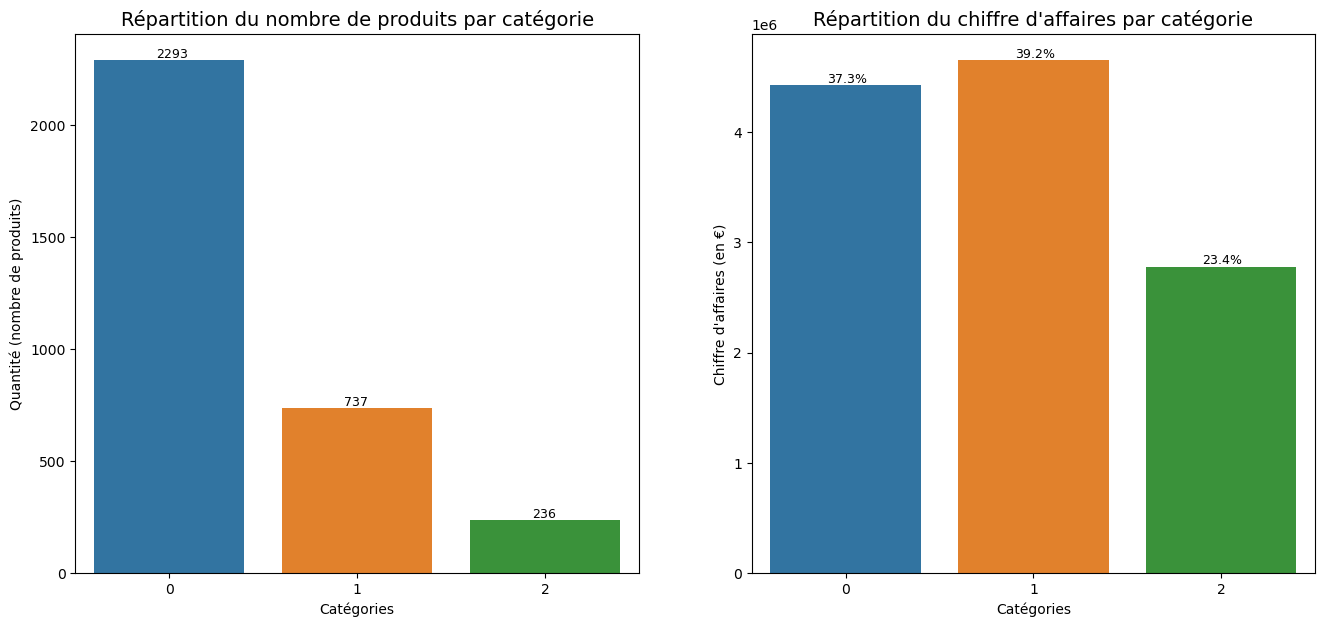

In [19]:
produit.groupby('categ')[['id_prod']].count()

# ajout de la proportion
categ_nb=produit.groupby('categ')['id_prod'].count().reset_index()
categ_nb['proportion'] = round(100*categ_nb['id_prod']/categ_nb['id_prod'].sum(),2)


plt.figure(figsize=(16,7))

plt.subplot(1,2,1)

sns.barplot(x=categ_nb['categ'], y=categ_nb['id_prod'])

plt.title("Répartition du nombre de produits par catégorie", size=14)

plt.ylabel("Quantité (nombre de produits)")
plt.xlabel("Catégories")

for i in range(len(categ_nb)):
    plt.text(i-0.07, categ_nb.iloc[i,1]+10, 
             categ_nb.iloc[i,1], fontsize=9)
    
plt.subplot(1,2,2)   
categ_vente=produit.groupby('categ')[['sum']].sum().reset_index()
categ_vente['proportion']=round(categ_vente['sum']/categ_vente['sum'].sum(),4)


sns.barplot(x=categ_vente['categ'], y=categ_vente['sum'])

plt.title("Répartition du chiffre d'affaires par catégorie", size=14)

plt.ylabel("Chiffre d'affaires (en €)")
plt.xlabel("Catégories")

for i in range(len(categ_vente)):
    plt.text(i-0.1, categ_vente.iloc[i,1]+2e4, 
             '{:.1%}'.format(categ_vente.iloc[i,2]), fontsize=9)

plt.show()

Sur les **3266 produits** différents vendus par l'entreprise, **2293 (70%)** appartiennent à la **catégorie 0**, **737 (23%) appartiennent à la catégorie 1** et **236 (7%) appartiennent à la catégorie 2**.

### Courbe de Lorenz des produits

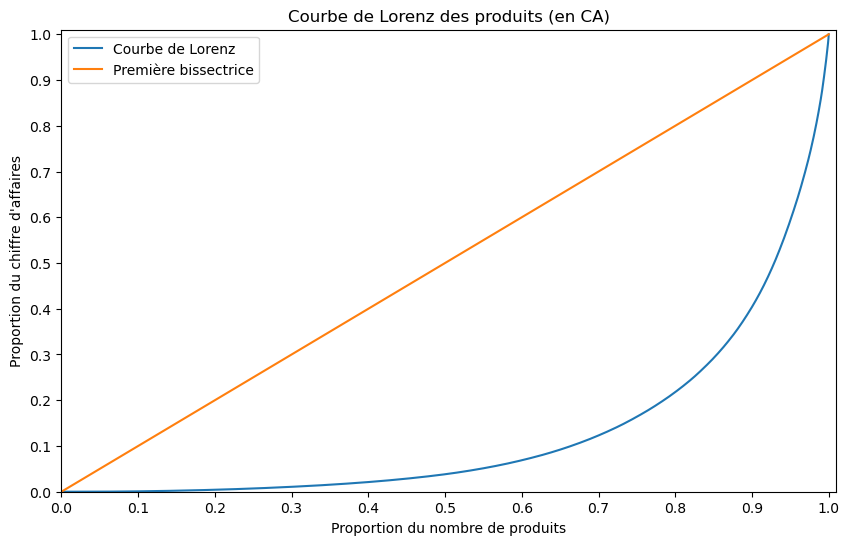

In [20]:
# df courbe de lorenz
produit_desc=produit.sort_values('sum')[['id_prod', 'sum']].reset_index(drop=True)
produit_desc['cumsum']=produit_desc['sum'].cumsum()
produit_desc['cumsum/CA']=produit_desc['cumsum']/produit_desc['sum'].sum()

y=np.array(produit_desc['cumsum/CA'])
# on ajoute un 0 pour commencer à 0 en x et y
y=np.append([0], y)
x=np.linspace(0, 1, len(y))

plt.figure(figsize=(10,6))

plt.plot(x, y, label='Courbe de Lorenz')
plt.plot(x, x, label='Première bissectrice')

plt.title('Courbe de Lorenz des produits (en CA)')
plt.xlabel('Proportion du nombre de produits')
plt.ylabel("Proportion du chiffre d'affaires")

plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlim(0, 1.01)
plt.ylim(0, 1.01)

plt.legend()

Cette courbe de Lorenz indique par exemple qu'**environ 20% des produits représentent 80%** du chiffre d'affaires.

Plus globalement, cette courbe de Lorenz montre que la **distribution du chiffre d'affaires des produits est inégalitaire**.

### Indice de Gini
**Deux fois l'aire entre la première bissectrice et la courbe de Lorenz (compris en 0 et 1), plus il est élevé, plus la distribution est inégalitaire.**

In [21]:
AUC = y.sum()/len(y) # Surface sous la courbe de Lorenz
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini=round(gini,3)
print(f"L'indice de Gini est de {gini}, ce qui confirme que la distribution du chiffre d'affaires des produits est très inégalitaire.")

L'indice de Gini est de 0.743, ce qui confirme que la distribution du chiffre d'affaires des produits est très inégalitaire.


## Analyse des Clients

In [22]:
# on utilise get_dummies compter chaque catégorie 
df2[['0', '1', '2']]=pd.get_dummies(df2['categ'])
df2[['m', 'f']]=pd.get_dummies(df2['sex'])

# agrégation des données qu'on veut garder
customers_agg=df2.groupby('client_id').agg(
    ventes_nb=('price', 'count'),
    ventes_ca=('price', 'sum'),
    categ_0=('0', 'sum'),
    categ_1=('1', 'sum'),
    categ_2=('2', 'sum')).reset_index()

customers_2=pd.read_csv(folder+'customers_2.csv')

customers=pd.merge(customers_agg, customers_2, on='client_id', how='left')

# on remet le type category pour sex
customers['sex']=customers['sex'].astype('category')
customers['categ_0']=customers['categ_0'].astype('int64')
customers['categ_1']=customers['categ_1'].astype('int64')
customers['categ_2']=customers['categ_2'].astype('int64')

# on calcule de nombre de panier par client
client_session=df2[['client_id', 'session_id']].drop_duplicates().groupby('client_id')[['session_id']].count().reset_index()

# on récupère les données de chaque client avec customers
customers=pd.merge(customers, client_session, on='client_id', how='left')

# on renomme le nombre de panier
customers.rename(columns={'session_id' : 'nb_panier'}, inplace=True)

# calcul du panier moyen par client en €
customers['panier_moyen']=(customers['ventes_ca']/customers['nb_panier']).apply(lambda x : '{:,.2f}'.format(x)).astype('float64')

customers.head()

,client_id,ventes_nb,ventes_ca,categ_0,categ_1,categ_2,sex,birth,age,nb_panier,panier_moyen
0,c_1,39,558.18,30,8,1,m,1955,68,33,16.91
1,c_10,58,"1,353.60",20,34,4,m,1956,67,34,39.81
2,c_100,8,254.85,2,5,1,m,1992,31,5,50.97
3,c_1000,125,"2,261.89",43,82,0,f,1966,57,93,24.32
4,c_1001,102,"1,812.86",70,31,1,m,1982,41,47,38.57


### Top Clients

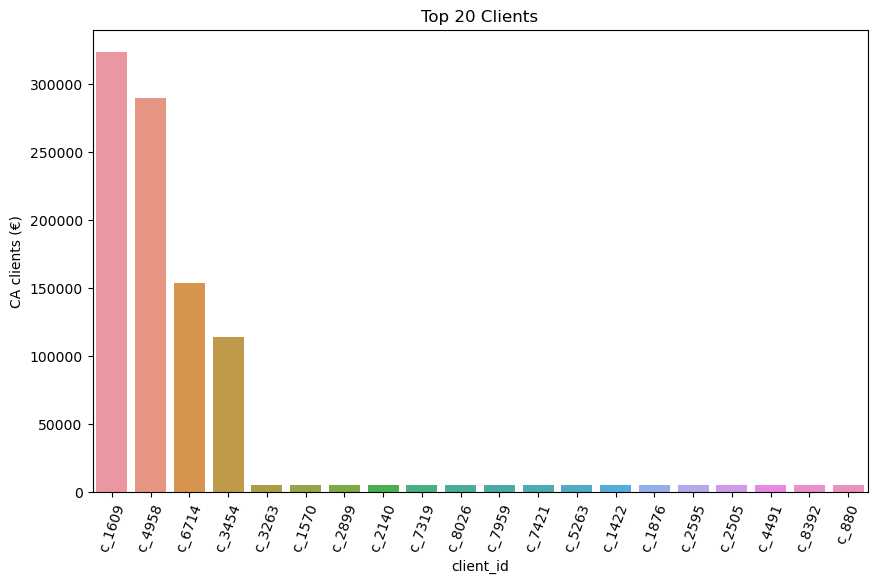

In [23]:
top20_client=customers.sort_values('ventes_ca', ascending=False).head(20).reset_index(drop=True)

plt.figure(figsize=(10,6))

plt.title('Top 20 Clients')

sns.barplot(data=top20_client, x='client_id', y='ventes_ca')

plt.ylabel('CA clients (€)')
plt.xticks(rotation=70);

On distingue 2 types de clients : les professionnels et les particuliers.
Les clients professionnels sont considérés comme des outliers.

Sur les 8600 clients, ces 4 clients représentent à eux seuls 7,43% du chiffre d'affaires total.

### Courbe de Lorenz des clients et indice de Gini

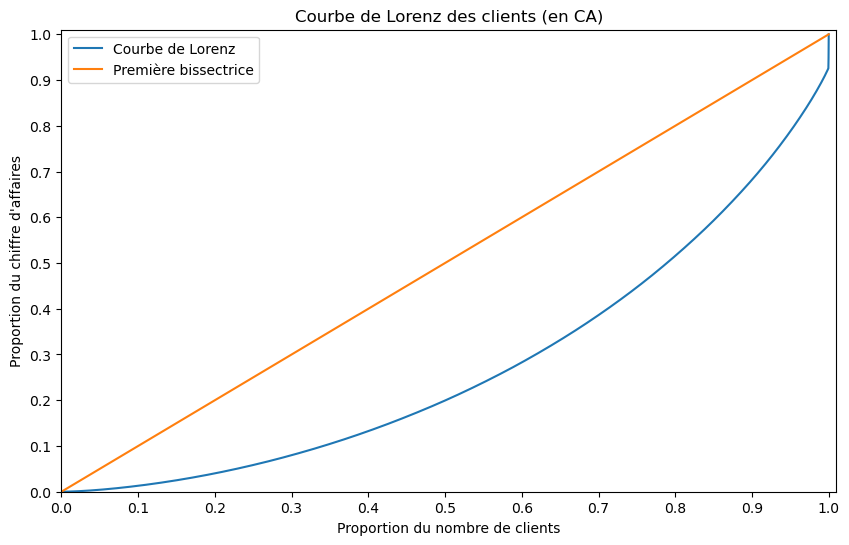

In [24]:
# classement des clients par ordre croissant de CA
client_desc=customers.sort_values('ventes_ca')[['client_id', 'ventes_ca']].reset_index(drop=True)
# création colonne somme cumulée
client_desc['cumsum']=client_desc['ventes_ca'].cumsum()
# création colonne somme cumulée/CA
client_desc['cumsum/CA']=client_desc['cumsum']/client_desc['ventes_ca'].sum()


y=np.array(client_desc['cumsum/CA'])
# on ajoute un 0 pour commencer à 0 en x et y
y=np.append([0], y)
x=np.linspace(0, 1, len(y))

plt.figure(figsize=(10,6))

plt.plot(x, y, label='Courbe de Lorenz')
plt.plot(x, x, label='Première bissectrice')

plt.title('Courbe de Lorenz des clients (en CA)')
plt.xlabel('Proportion du nombre de clients')
plt.ylabel("Proportion du chiffre d'affaires")

plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlim(0, 1.01)
plt.ylim(0, 1.01)

plt.legend()

Le graphique indique par exemple qu'environ 20% des clients représentent 50% du CA.

On voit aussi les 4 outliers par le segment vertical à la fin.

In [25]:
# Indice de GINI

AUC = y.sum()/len(y) # Surface sous la courbe de Lorenz
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini=round(gini,3)
print(f"L'indice de Gini est de {gini}, ce qui confirme que la distribution des ventes clients est plutôt inégalitaire.")

L'indice de Gini est de 0.446, ce qui confirme que la distribution des ventes clients est plutôt inégalitaire.


## Partie 2 : Analyses bivariées

Nous allons étudié les corrélations en plusieurs variables quantitatives ou qualitatives à l'aide des tests du Chi2, de Regression Linéaire et de l'ANOVA.

### 1. Lien entre le genre du client et les catégories de livres achetés

Ici nous avons **2 variables qualitatives**, nous allons donc effectuer un **test du Chi2**.

Le test du chi2 va permettre de déterminer si ces 2 variables catégorielles sont indépendantes en comparant un chi2 théorique **(fréquences attendues)** avec un chi2 calculé **(fréquences observées)**.

#### Tableau de contingence 
Tableau qui compte le nombre d'occurences entre 2 variables qualitatives, on l'occurence entre la catégorie de livre et le genre.

In [96]:
X = df2['categ'].values.reshape(df2['categ'].values.shape[0], 1)
y = df2['sex'].replace(['f', 'm'], [1, 0])
y = y.values.reshape(y.values.shape[0], 1)
from sklearn.feature_selection import chi2
chi2(X,y)

(array([0.02586476]), array([0.87223105]))

In [26]:
warnings.simplefilter("ignore")

In [27]:
crosstab=pd.crosstab(index=df2['categ'], columns=df2['sex'], margins=True, margins_name='Total')
crosstab

sex,f,m,Total
categ,,,
0,206220,209460,415680
1,114899,112270,227169
2,17283,19200,36483
Total,338402,340930,679332


#### Test du chi2

Voici le test statistique :

- H0 : Les variables genre et catégorie sont indépendantes

- H1 : Les variables genre et catégories sont liées

On rejetera H0 si la pvalue < alpha avec alpha = 5%

In [28]:
from scipy.stats import chi2_contingency

# Le test du chi2
statistic_test_chi_square, pvalue, degre_liberte, expected_count= chi2_contingency(crosstab.iloc[:3, :2])
chi2_contingency(crosstab.iloc[:3, :2])

print('Le test statistique chi square :', statistic_test_chi_square)
print('La pvalue :', pvalue)
print('Les degrés de liberté :', degre_liberte)
print('Le tableau de contingence avec les expected count :', expected_count)

Le test statistique chi square : 147.00253568681114
La pvalue : 1.1989607410166063e-32
Les degrés de liberté : 2
Le tableau de contingence avec les expected count : [[207066.56444861 208613.43555139]
 [113161.81769444 114007.18230556]
 [ 18173.61785695  18309.38214305]]


La valeur de la pvalue est de 1.1989607410166063e-32 << 0.05

On rejette H0, donc les variables genre et catégorie sont liées d'après le test du chi2.

#### Calcul des résidus standardisés
Pour chaque intersection entre les variables qualitatives, on va calculer les résidus standardisés

In [29]:
# calcul des ni, les sous totaux des colonnes
ni=crosstab.iloc[-1,:-1].values

# calcul des nj, les sous totaux des lignes 
nj=crosstab.iloc[:-1,-1].values

# on redimensionne les matrices pour le produit matriciel
ni = np.reshape(ni, (1,(crosstab.shape[1]-1)))
nj = np.reshape(nj, ((crosstab.shape[0]-1),1))

# calcul des count, les fréquences réelles
count=crosstab.iloc[:-1, :-1]

# Tableau des résidus
numerateur = (count-expected_count)
denominateur = np.sqrt(ni*nj/crosstab.iloc[-1,-1])
tableau_residus=numerateur/denominateur
tableau_residus

sex,f,m
categ,,
0,-1.86,1.85
1,5.16,-5.14
2,-6.61,6.58


La dépendance entre les 2 variables est **marquée** pour l'**intersection homme-catégorie2 et femme-catégorie1.**

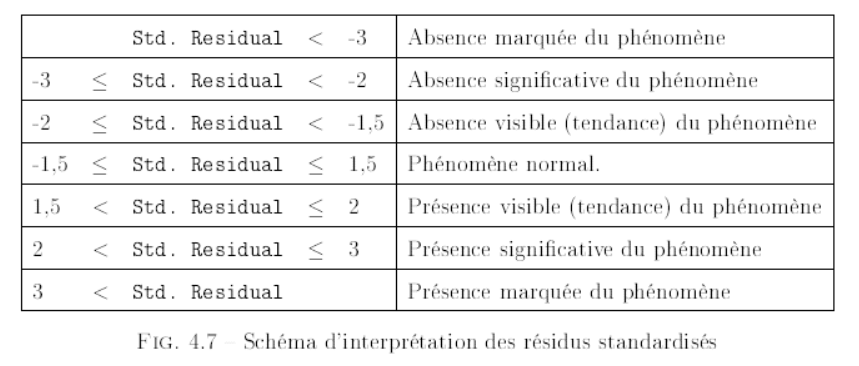

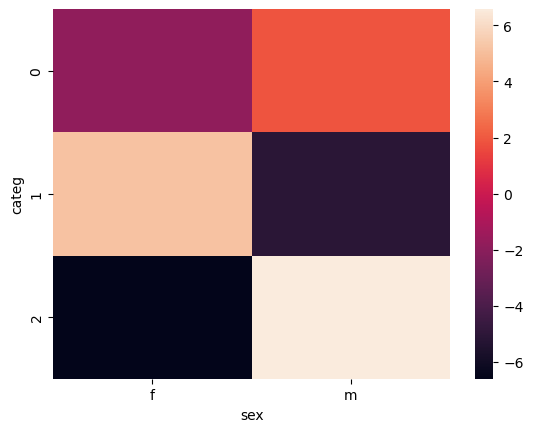

In [30]:
# heatmap des résidus standardisés
sns.heatmap(tableau_residus);

#### Conclusion Chi2

Les variables genre et catégorie sont liées d'après le test du chi2.

La dépendance entre les 2 variables est marquée pour l'intersection homme-catégorie2 et femme-catégorie1.

**Cela signifie que les livres de catégorie 2 sont suceptibles d'intéresser plus les hommes et que les livres de catégorie 1 sont suceptibles d'intéresser plus les femmes.**

### 2. Lien entre l’âge des clients et le montant total des achats

Nous allons étudier les corrélations entre **2 variables quantitatives** : l'âge des clients et le montant total des achats de ces clients. 

Pour cela, nous allons calculer le **coefficient de pearson et faire un test de régression linéaire**.

In [31]:
# fonctions personnels du chapitre précédent, vous trouverez joint le fichier fonctions
from fonctions import *

#### Analyse univariée de la variable vente_ca (montant total des achats)

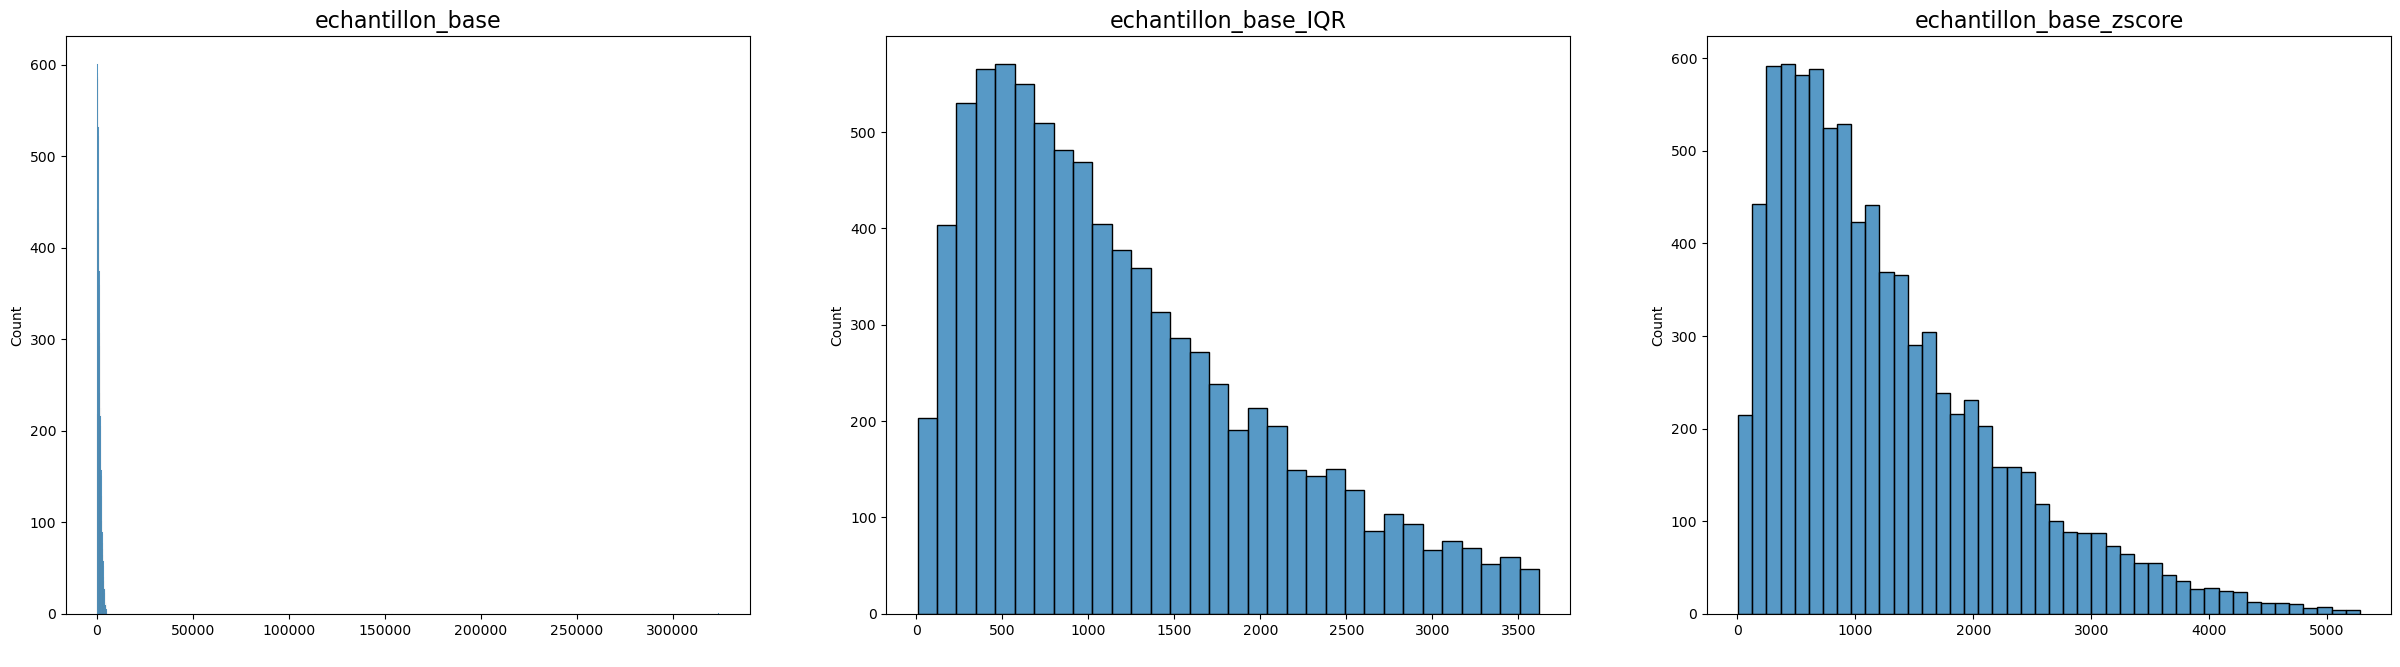

In [32]:
# fonction qui génère les histogrammes de chaque échantillon
hist_var(customers['ventes_ca'], 3)

**On enlève les 4 outliers avec la méthode du zscore**

La distribution est extrêmement dispersée à cause des 4 outliers. Cela se manifeste au niveau des indicateurs : 

- Différence moyenne/médiane
- Ecart type
- Coefficient de variation
- Skewness
- Kurtosis

Le fait de retirer ces 4 outliers améliore l'échantillon comme on le voit sur la colonne du zscore (3e colonne).

#### Analyse bivariée

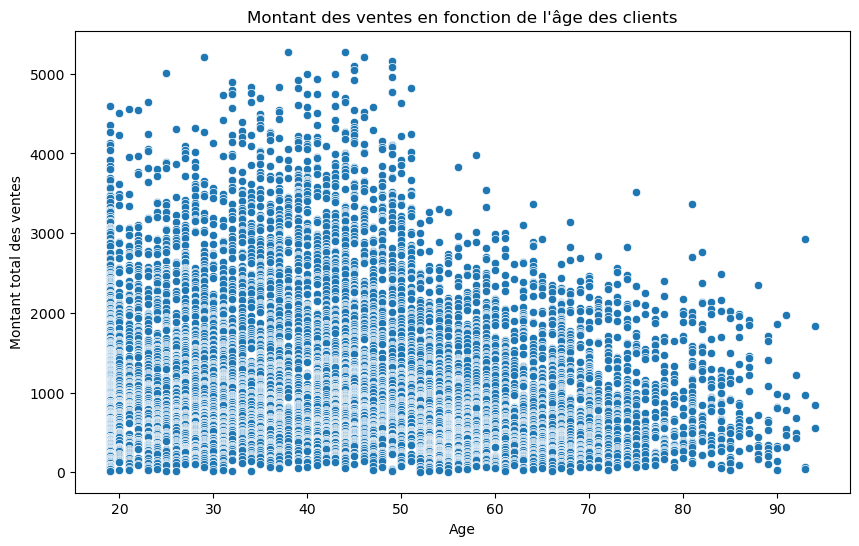

In [33]:
# Df des clients sans les 4 outliers zscore
customers_vente_ca_zscore=customers.sort_values('ventes_ca', ascending=False).iloc[4:, :]

X=customers_vente_ca_zscore['age']
Y=customers_vente_ca_zscore['ventes_ca']

# Création du nuage de point
plt.figure(figsize=(10,6))

plt.ylabel('Montant total des ventes')
plt.xlabel('Age')
plt.title("Montant des ventes en fonction de l'âge des clients")

sns.scatterplot(X, Y);

Il semblerait qu'il y est une **légère corrélation négative** entre le montant total des achats et l'âge des clients.

#### Coefficient de pearson

Un coefficient de pearson proche de 0 indique une absence de corrélation entre les 2 variables.

Un coefficient de pearson proche de 1 indique une corrélation positive entre les 2 variables.

Un coefficient de pearson proche de -1 indique une corrélation négative entre les 2 variables.

Nous formulons de nouveau un test d'hypothèse avec :

- H0 : Les variables âge et montant total des achats sont indépendantes
- H1 : Les variables âge et montant total des achats sont liées

On prend un risque d'erreur alpha=5%

In [34]:
alpha=0.05
r_pearson, pvalue = st.pearsonr(X, Y)
st.pearsonr(X, Y)

PearsonRResult(statistic=-0.18832651564713132, pvalue=1.8592326764596198e-69)

In [35]:
# création d'une fonction qu'on pourra réutiliser
def pearson(r_pearson, pvalue, alpha):
    
    if pvalue < alpha : interpretation_pvalue = f'La pvalue est inférieur à alpha ({round(pvalue,4)}<{alpha}) donc on rejette H0, on considère que les variables sont liées.'
    if pvalue > alpha : interpretation_pvalue = f'La pvalue est supérieur à alpha ({round(pvalue,4)}<{alpha}) donc on accepte H0, on considère que les variables sont indépendantes.'
        
    if r_pearson>0 : nature_interrelation='positive'
    if r_pearson<0 : nature_interrelation='négative'
    
    if 0.7<=abs(r_pearson)<=1 : interpretation_pearson = f'Le coefficient de Pearson est de {round(r_pearson,4)}, on considère donc une interrelation {nature_interrelation} linéaire très forte entre les variables.'
    if 0.5<=abs(r_pearson)<0.7 : interpretation_pearson = f'Le coefficient de Pearson est de {round(r_pearson,4)}, on considère donc une interrelation {nature_interrelation} linéaire forte entre les variables.'
    if 0.3<=abs(r_pearson)<0.5 : interpretation_pearson = f'Le coefficient de Pearson est de {round(r_pearson,4)}, on considère donc une interrelation {nature_interrelation} linéaire modérée entre les variables.'
    if 0.1<=abs(r_pearson)<0.3 : interpretation_pearson = f'Le coefficient de Pearson est de {round(r_pearson,4)}, on considère donc une interrelation {nature_interrelation} linéaire faible entre les variables.'
    if 0<=abs(r_pearson)<0.1 : interpretation_pearson = f'Le coefficient de Pearson est de {round(r_pearson,4)}, on considère donc une interrelation {nature_interrelation} linéaire négligeable entre les variables.'
    
    print('INTERPRETATION TEST STATISTIQUE DE PEARSON', '\n', '-'*100)
    return print(interpretation_pvalue,'\n', interpretation_pearson, '\n', 100*'-')

In [36]:
# utilisation de la fonction créé 
pearson(r_pearson, pvalue, alpha)

INTERPRETATION TEST STATISTIQUE DE PEARSON 
 ----------------------------------------------------------------------------------------------------
La pvalue est inférieur à alpha (0.0<0.05) donc on rejette H0, on considère que les variables sont liées. 
 Le coefficient de Pearson est de -0.1883, on considère donc une interrelation négative linéaire faible entre les variables. 
 ----------------------------------------------------------------------------------------------------


#### Régression linéaire

In [37]:
customers_vente_ca_zscore['intercept']=1
X=customers_vente_ca_zscore[['age', 'intercept']]
Y=customers_vente_ca_zscore['ventes_ca']
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ventes_ca   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     316.0
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           1.86e-69
Time:                        10:06:23   Log-Likelihood:                -71020.
No. Observations:                8596   AIC:                         1.420e+05
Df Residuals:                    8594   BIC:                         1.421e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          -10.6291      0.598    -17.777      0.000     -11.801      -9.457
intercept   1752.2939     28.598     61.274      0.000    1696.235    1808.353
==============================================================================
Omnibus:                     1371.454   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2169.072
Skew:                           1.111   Prob(JB):                         0.00
Kurtosis:                       4.057   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# création fonction pour analyser les résultats du sommaire

def analyse_results_summary(a, b, rsquared) :
    print('ANALYSE DU MODELE DE REGRESSION LINEAIRE')
    print(100*'-')
    
    print(f"Le modèle à pour équation : y = {round(a,4)} * x + {round(b,4)}")
    print(f"Le R² est de {round(rsquared,5)}.")
    print(f"Cela signifie que {100*round(rsquared,5)}% des variations de la variable cible ({Y.name} ici) sont expliquées par le modèle.")
    
    if rsquared < 0.1 : print("Le R² est proche de 0, ce qui signifie que le modèle n'explique pas les variations de la variable cible.")
    
    print(100*'-')

In [39]:
analyse_results_summary(results.params[0], results.params[1], results.rsquared)

ANALYSE DU MODELE DE REGRESSION LINEAIRE
----------------------------------------------------------------------------------------------------
Le modèle à pour équation : y = -10.6291 * x + 1752.2939
Le R² est de 0.03547.
Cela signifie que 3.547% des variations de la variable cible (ventes_ca ici) sont expliquées par le modèle.
Le R² est proche de 0, ce qui signifie que le modèle n'explique pas les variations de la variable cible.
----------------------------------------------------------------------------------------------------


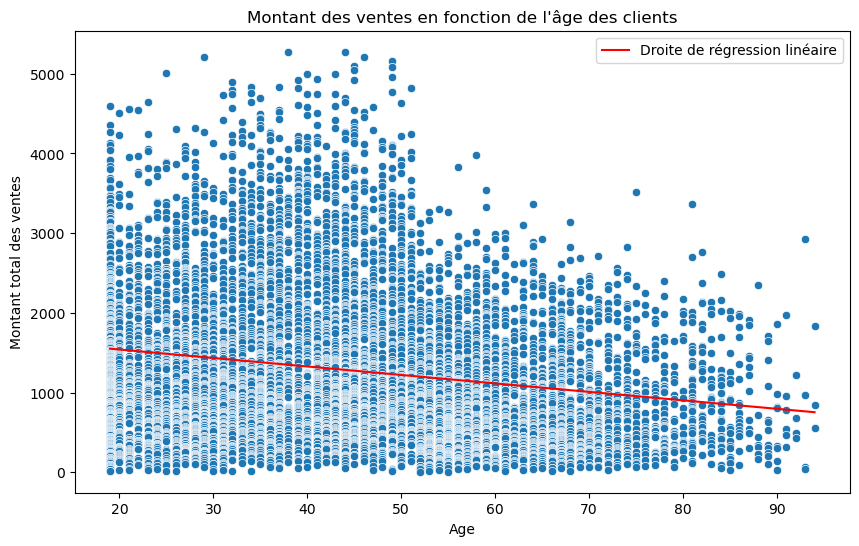

In [40]:
X=customers_vente_ca_zscore['age']
Y=customers_vente_ca_zscore['ventes_ca']

a = results.params[0]
b = results.params[1]
x = np.linspace(X.min(), X.max(), len(X))
y = a*x + b

plt.figure(figsize=(10,6))

plt.ylabel('Montant total des ventes')
plt.xlabel('Age')
plt.title("Montant des ventes en fonction de l'âge des clients")

sns.scatterplot(X, Y)
plt.plot(x, y, c='r', label='Droite de régression linéaire')

plt.legend()

plt.show()

**Voici la droite de régression linéaire du modèle**

In [41]:
# on teste la normalité des résidus
st.shapiro(results.resid)

ShapiroResult(statistic=0.9178572297096252, pvalue=0.0)

In [42]:
# création fonction pour l'analyse du résultat
def analyse_shapiro (echantillon, alpha):
    print('ANALYSE DU TEST DE NORMALITE DE SHAPIRO-WILK')
    print(100*'-')
    
    print ("H0 : L'échantillon suit une loi normale")
    print ("H1 : L'échantillon ne suit pas une loi normale")
    
    print ('alpha =', alpha)

    print(f"La pvalue est de {st.shapiro(echantillon)[1]}")
    
    if st.shapiro(echantillon)[1]<alpha : print ("pvalue < alpha donc on rejette H0, l'échantillon ne suit pas une loi normale")
    else : print ("pvalue > alpha donc on ne peut pas rejeter H0, l'échantillon suit une loi normale")
    
    print(100*'-')

In [43]:
analyse_shapiro(echantillon=results.resid, alpha=0.05)

ANALYSE DU TEST DE NORMALITE DE SHAPIRO-WILK
----------------------------------------------------------------------------------------------------
H0 : L'échantillon suit une loi normale
H1 : L'échantillon ne suit pas une loi normale
alpha = 0.05
La pvalue est de 0.0
pvalue < alpha donc on rejette H0, l'échantillon ne suit pas une loi normale
----------------------------------------------------------------------------------------------------


#### Test non paramétrique de Spearman

In [44]:
# coefficient de spearman à calculer car les résidus ne suivent pas une loi normale
st.spearmanr(customers_vente_ca_zscore['age'], customers_vente_ca_zscore['ventes_ca'])

SpearmanrResult(correlation=-0.18510216430152956, pvalue=4.026595131929659e-67)

In [45]:
# création fonction pour l'analyse du résultat
def analyse_spearmans (X, Y, alpha):
    print('ANALYSE DU TEST DE SPEARMAN')
    print(100*'-')
    
    print ("H0 : Il n'y a pas de corrélation entre les 2 variables ")
    print ("H1 : Il y a une corrélation entre les 2 variables")
    
    print ('alpha =', alpha)

    print(f"La pvalue est de {st.spearmanr(X, Y)[1]}")
    print(f"La coefficient de spearman est de {st.spearmanr(X, Y)[0]}")
    
    if st.spearmanr(X, Y)[0]>0 : nature_correlation='positive'
    if st.spearmanr(X, Y)[0]<0 : nature_correlation='négative'
        
    coefficient_spearman = '{:.2%}'.format(st.spearmanr(X, Y)[0])
    
    if st.spearmanr(X, Y)[1]<alpha : 
        
        print ("pvalue < alpha donc on rejette H0, Il y a une corrélation entre les 2 variables")
        print(f"Il y a une corrélation {nature_correlation} de {coefficient_spearman} comme l'indique le coefficient de Spearman")
    
    else : print ("pvalue > alpha donc on ne peut pas rejeter H0, Il n'y a pas de corrélation entre les 2 variables")
        
    print(100*'-')

In [46]:
analyse_spearmans (X=customers_vente_ca_zscore['age'], Y=customers_vente_ca_zscore['ventes_ca'], alpha=0.05)

ANALYSE DU TEST DE SPEARMAN
----------------------------------------------------------------------------------------------------
H0 : Il n'y a pas de corrélation entre les 2 variables 
H1 : Il y a une corrélation entre les 2 variables
alpha = 0.05
La pvalue est de 4.026595131929659e-67
La coefficient de spearman est de -0.18510216430152956
pvalue < alpha donc on rejette H0, Il y a une corrélation entre les 2 variables
Il y a une corrélation négative de -18.51% comme l'indique le coefficient de Spearman
----------------------------------------------------------------------------------------------------


#### Conclusion test de régression linéaire

Il y a une corrélation négative de -18.51% comme l'indique le coefficient de Spearman.

Concrêtement, cela veut dire que le montant total des achats clients va avoir tendance à baisser quand l'âge va augmenter.

### 3. Lien entre l’âge des clients et la fréquence d’achat

Nous allons de nouveau étudier les corrélations entre 2 variables quantitatives : l'âge des clients et la fréquence d'achat.

In [47]:
# Nombre de mois sur lequel se passe les ventes dans le dataset
nombre_mois = df2['mois'].unique().shape[0]

# Calcul de la fréquence d'achat
customers['frequence_achat']=customers['ventes_nb']/nombre_mois

In [48]:
# on fait un melt avec le df customers pour faciliter le traitement et les visualisations
# ce df permet d'afficher avec seaborn 2 variables quantitatives et une variable catégorielle facilement
customers_melt=pd.melt(customers,
        id_vars=['client_id', 'ventes_nb', 'ventes_ca',
       'sex', 'birth', 'age', 'nb_panier', 'panier_moyen', 'frequence_achat'],
       value_vars=['categ_0', 'categ_1', 'categ_2'],
       var_name='categ',
       value_name='nb_categ')

customers_melt.loc[customers_melt['categ']=='categ_0', 'categ']=0
customers_melt.loc[customers_melt['categ']=='categ_1', 'categ']=1
customers_melt.loc[customers_melt['categ']=='categ_2', 'categ']=2

customers_melt['categ']=customers_melt['categ'].astype('category')

customers_melt.drop(customers_melt[customers_melt['nb_categ']==0].index, inplace=True)

# Nombre de mois sur lequel se passe les ventes dans le dataset
nombre_mois = df2['mois'].unique().shape[0]

# Calcul de la fréquence d'achat
customers_melt['frequence_achat']=round(customers_melt['ventes_nb']/nombre_mois,3)

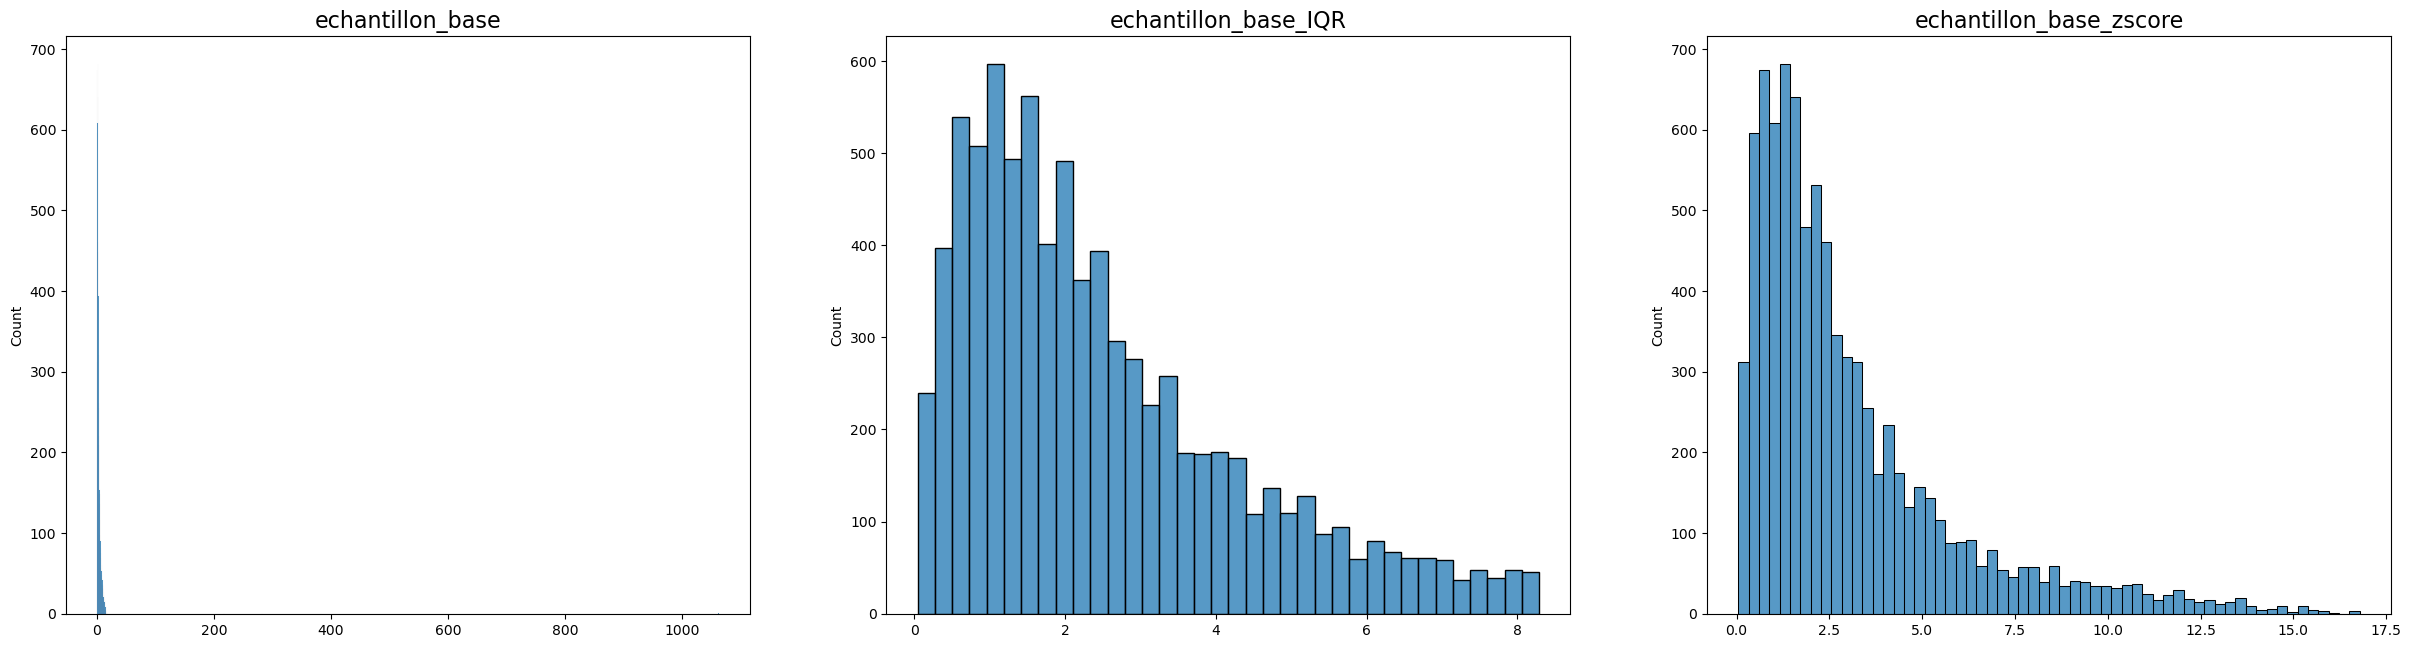

In [49]:
hist_var(customers['frequence_achat'],3)

L'analyse est similaire au montant total des achats des clients, la distribution est extrêmement dispersée à cause des 4 mêmes outliers. Cela se manifeste au niveau des mêmes indicateurs : 

- Différence moyenne/médiane
- Ecart type
- Coefficient de variation
- Skewness
- Kurtosis

Le fait de retirer ces 4 outliers améliore l'échantillon comme on le voit sur la colonne du zscore (3e colonne).

In [50]:
# création du df qu'on va utiliser pour la régression linéaire
df_frequence_zscore = customers.sort_values('frequence_achat', ascending = False).iloc[4:, :].reset_index(drop=True)

#### Analyse bivariée

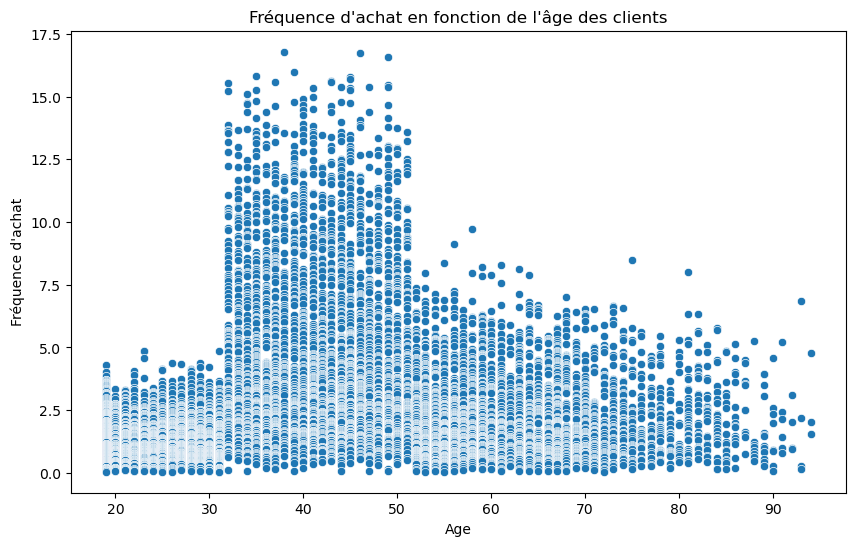

In [51]:
X=df_frequence_zscore['age']
Y=df_frequence_zscore['frequence_achat']

# Création du nuage de point
plt.figure(figsize=(10,6))

plt.ylabel("Fréquence d'achat")
plt.xlabel('Age')
plt.title("Fréquence d'achat en fonction de l'âge des clients")

sns.scatterplot(X, Y);

On identifie 3 groupes sur ce nuage de points :

- Les 19 - 32 ans 
  
- Les 32 - 52 ans

- Les 52 ans et plus

Il semblerait que chaque groupe à un comportement distinct.

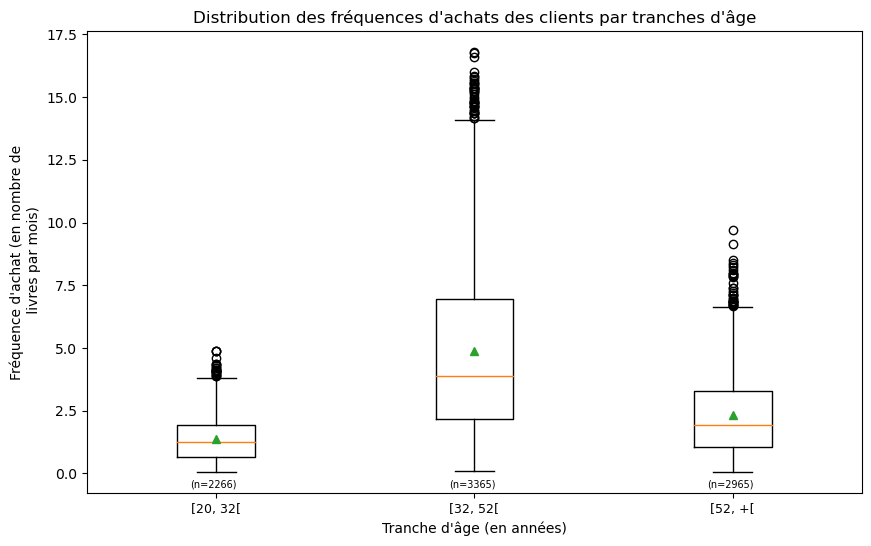

In [52]:
# création d'un df par tranche d'âge
df_age_19_32 = df_frequence_zscore.loc[df_frequence_zscore['age'] < 32, :]
df_age_32_52 = df_frequence_zscore.loc[(df_frequence_zscore['age'] >= 32) & (df_frequence_zscore['age']<52), :]
df_age_52_plus = df_frequence_zscore.loc[df_frequence_zscore['age'] >= 52, :]

# création array pour chaque variable fréquence d'achat
freq_19_32 = df_age_19_32['frequence_achat'].values
freq_32_52 = df_age_32_52['frequence_achat'].values
freq_52_plus = df_age_52_plus['frequence_achat'].values

# tableau qui regroupe les 3 autres
tab_freq_tranche_age=np.array([freq_19_32, freq_32_52, freq_52_plus])

plt.figure(figsize=(10, 6))

plt.title("Distribution des fréquences d'achats des clients par tranches d'âge")
plt.xlabel("Tranche d'âge (en années)")
plt.ylabel("Fréquence d'achat (en nombre de\n livres par mois)")

plt.boxplot(tab_freq_tranche_age, showmeans=True)

plt.xticks([1, 2, 3], ['[20, 32[', '[32, 52[', '[52, +['], size=9)

for i in range(len(tab_freq_tranche_age)):
    plt.text(i+0.9, -0.55, "(n={})".format(len(tab_freq_tranche_age[i])), size=7)

plt.show()

**Les boites à moustaches montrent que les 3 groupes ont des comportements distincts (moyenne, médiane, variabilité)**

#### Coefficient de pearson

In [53]:
X=df_frequence_zscore['age']
Y=df_frequence_zscore['frequence_achat']

alpha = 0.05

r_pearson, pvalue = st.pearsonr(X, Y)
st.pearsonr(X, Y)

PearsonRResult(statistic=0.030434482563375432, pvalue=0.004773043694453126)

In [54]:
pearson(r_pearson, pvalue, alpha)

INTERPRETATION TEST STATISTIQUE DE PEARSON 
 ----------------------------------------------------------------------------------------------------
La pvalue est inférieur à alpha (0.0048<0.05) donc on rejette H0, on considère que les variables sont liées. 
 Le coefficient de Pearson est de 0.0304, on considère donc une interrelation positive linéaire négligeable entre les variables. 
 ----------------------------------------------------------------------------------------------------


#### Test de régression linéaire

In [55]:
df_frequence_zscore['intercept']=1
X=df_frequence_zscore[['age', 'intercept']]
Y=df_frequence_zscore['frequence_achat']
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        frequence_achat   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.968
Date:                Thu, 20 Apr 2023   Prob (F-statistic):            0.00477
Time:                        10:06:30   Log-Likelihood:                -21130.
No. Observations:                8596   AIC:                         4.226e+04
Df Residuals:                    8594   BIC:                         4.228e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0051      0.002      2.823      0.005       0.002       0.009
intercept      2.8390      0.086     32.917      0.000       2.670       3.008
==============================================================================
Omnibus:                     2860.967   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8207.613
Skew:                           1.776   Prob(JB):                         0.00
Kurtosis:                       6.210   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
analyse_results_summary(results.params[0], results.params[1], results.rsquared)

ANALYSE DU MODELE DE REGRESSION LINEAIRE
----------------------------------------------------------------------------------------------------
Le modèle à pour équation : y = 0.0051 * x + 2.839
Le R² est de 0.00093.
Cela signifie que 0.093% des variations de la variable cible (frequence_achat ici) sont expliquées par le modèle.
Le R² est proche de 0, ce qui signifie que le modèle n'explique pas les variations de la variable cible.
----------------------------------------------------------------------------------------------------


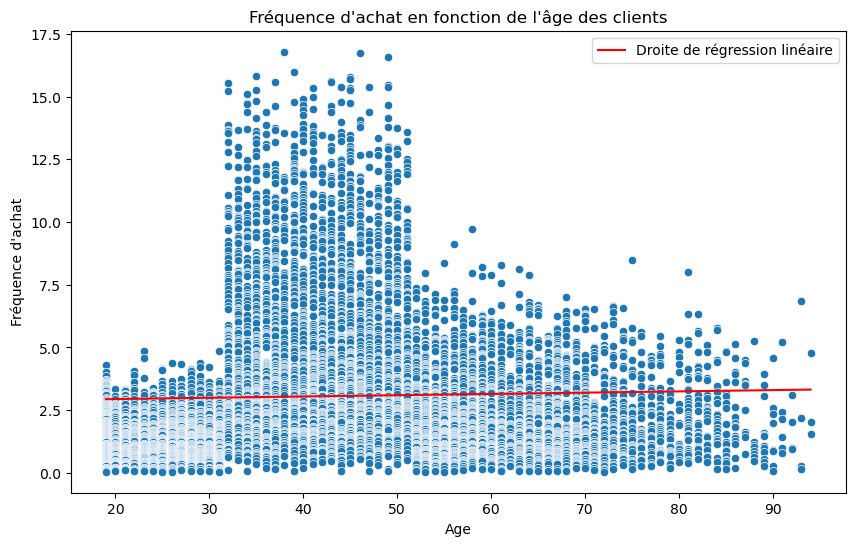

In [57]:
X=df_frequence_zscore['age']
Y=df_frequence_zscore['frequence_achat']

a = results.params[0]
b = results.params[1]
x = np.linspace(X.min(), X.max(), len(X))
y = a*x + b

plt.figure(figsize=(10,6))

plt.ylabel("Fréquence d'achat")
plt.xlabel('Age')
plt.title("Fréquence d'achat en fonction de l'âge des clients")

sns.scatterplot(X, Y)
plt.plot(x, y, c='r', label='Droite de régression linéaire')

plt.legend()

plt.show()

**Voici la droite de régression linéaire du modèle**

#### Etude de la normalité des résidus

In [58]:
st.shapiro(results.resid)

ShapiroResult(statistic=0.8132218718528748, pvalue=0.0)

In [59]:
analyse_shapiro(echantillon=results.resid, alpha=0.05)

ANALYSE DU TEST DE NORMALITE DE SHAPIRO-WILK
----------------------------------------------------------------------------------------------------
H0 : L'échantillon suit une loi normale
H1 : L'échantillon ne suit pas une loi normale
alpha = 0.05
La pvalue est de 0.0
pvalue < alpha donc on rejette H0, l'échantillon ne suit pas une loi normale
----------------------------------------------------------------------------------------------------


#### Test non paramétrique de Spearman 
Car les résidus ne suivent pas une loi normale

In [60]:
st.spearmanr(df_frequence_zscore['age'], df_frequence_zscore['frequence_achat'])
analyse_spearmans (X=df_frequence_zscore['age'], Y=df_frequence_zscore['frequence_achat'], alpha=0.05)

ANALYSE DU TEST DE SPEARMAN
----------------------------------------------------------------------------------------------------
H0 : Il n'y a pas de corrélation entre les 2 variables 
H1 : Il y a une corrélation entre les 2 variables
alpha = 0.05
La pvalue est de 7.088426379034454e-33
La coefficient de spearman est de 0.12829742372670497
pvalue < alpha donc on rejette H0, Il y a une corrélation entre les 2 variables
Il y a une corrélation positive de 12.83% comme l'indique le coefficient de Spearman
----------------------------------------------------------------------------------------------------


In [61]:
# test de spearman l'échantillon des 32 ans et plus
df_age_32_plus = df_frequence_zscore.loc[df_frequence_zscore['age'] >= 32, :]

st.spearmanr(df_age_32_plus['age'], df_age_32_plus['frequence_achat'])
analyse_spearmans (X=df_age_32_plus['age'], Y=df_age_32_plus['frequence_achat'], alpha=0.05)

ANALYSE DU TEST DE SPEARMAN
----------------------------------------------------------------------------------------------------
H0 : Il n'y a pas de corrélation entre les 2 variables 
H1 : Il y a une corrélation entre les 2 variables
alpha = 0.05
La pvalue est de 6.719849231111878e-203
La coefficient de spearman est de -0.3685570304593956
pvalue < alpha donc on rejette H0, Il y a une corrélation entre les 2 variables
Il y a une corrélation négative de -36.86% comme l'indique le coefficient de Spearman
----------------------------------------------------------------------------------------------------


#### Conclusion test de régression linéaire

Les 2 variables sont corrélées, mais pas de manière linéaire, le plus pertinent est de traiter les 3 groupes d'âge distinctement. 

- Les 19-32 ans : ils ont une fréquence d'achat faible et variabilité de leur fréquence d'achat faible.
(avec une moyenne de 1.37 livres/mois, écart type de 0.88.)


- Les 32-52 ans : ils ont une fréquence d'achat élevé et variabilité de leur fréquence d'achat élevé.
(avec une moyenne de 4.88 livres/mois, écart type de 3.45.)


- Les 52 ans et plus : ils ont une fréquence d'achat modérée et variabilité de leur fréquence d'achat modérée.
(avec une moyenne de 2.31 livres/mois, écart type de 1.63.)

### 4. Lien entre l’âge des clients et la taille du panier moyen

Nous allons de nouveau étudier les corrélations entre 2 variables quantitatives : l'âge des clients et le panier moyen. 

In [62]:
# conversion panier moyen en float
customers['panier_moyen'] = customers['panier_moyen'].astype('float64')

#### Analyse univariée panier moyen

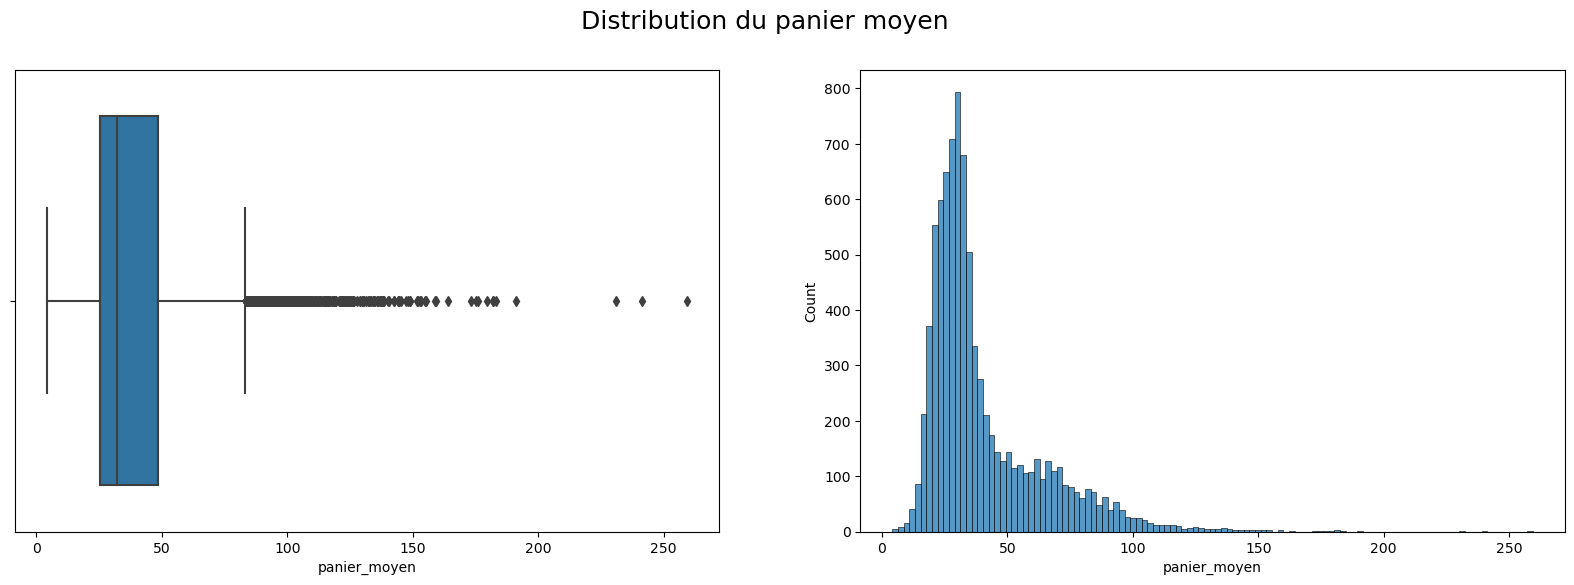

In [63]:
plt.figure(figsize=(20,6))

plt.suptitle("Distribution du panier moyen", size=18)

plt.subplot(1,2,1)
sns.boxplot(customers['panier_moyen'])

plt.subplot(1,2,2)
sns.histplot(customers['panier_moyen']);

Voici la distribution du panier moyen, ici on garde tout l'échantillon.

#### Test de régression échantillon de base

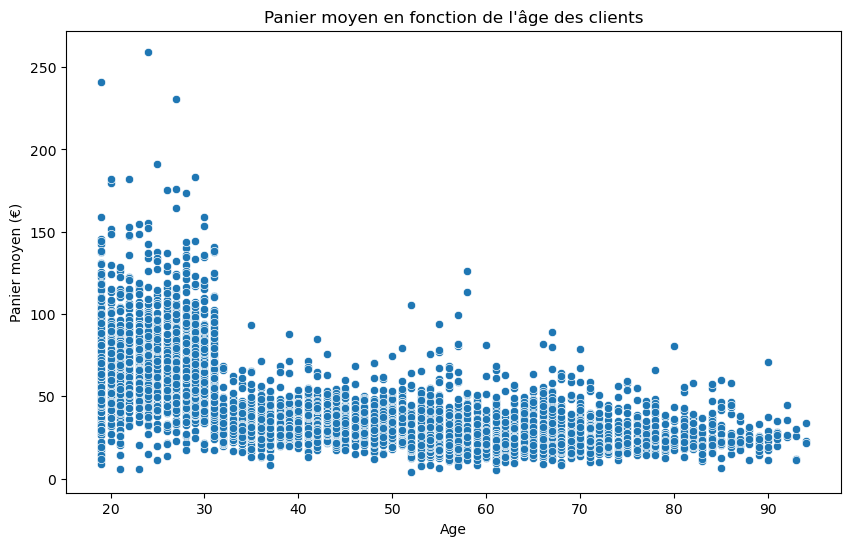

In [64]:
# Création du nuage de point
plt.figure(figsize=(10,6))

plt.ylabel("Panier moyen (€)")
plt.xlabel('Age')
plt.title("Panier moyen en fonction de l'âge des clients")

sns.scatterplot(customers['age'], customers['panier_moyen']);

**Il semblerait qu'il y a une corrélation négative entre les 2 variables.**

In [65]:
# Calcul du coefficient de Pearson et interprétation

X=customers['age']
Y=customers['panier_moyen']

alpha = 0.05

r_pearson, pvalue = st.pearsonr(X, Y)

pearson(r_pearson, pvalue, alpha)

INTERPRETATION TEST STATISTIQUE DE PEARSON 
 ----------------------------------------------------------------------------------------------------
La pvalue est inférieur à alpha (0.0<0.05) donc on rejette H0, on considère que les variables sont liées. 
 Le coefficient de Pearson est de -0.6169, on considère donc une interrelation négative linéaire forte entre les variables. 
 ----------------------------------------------------------------------------------------------------


In [66]:
# Test de régression linéaire avec statmodels et tableau récapitulatif

customers['intercept']=1
X=customers[['age', 'intercept']]
Y=customers['panier_moyen']
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           panier_moyen   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     5282.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:06:32   Log-Likelihood:                -37208.
No. Observations:                8600   AIC:                         7.442e+04
Df Residuals:                    8598   BIC:                         7.443e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.8489      0.012    -72.680      0.000      -0.872      -0.826
intercept     78.3627      0.559    140.274      0.000      77.268      79.458
==============================================================================
Omnibus:                     3754.184   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29651.269
Skew:                           1.911   Prob(JB):                         0.00
Kurtosis:                      11.255   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
analyse_results_summary(results.params[0], results.params[1], results.rsquared)

ANALYSE DU MODELE DE REGRESSION LINEAIRE
----------------------------------------------------------------------------------------------------
Le modèle à pour équation : y = -0.8489 * x + 78.3627
Le R² est de 0.38056.
Cela signifie que 38.056% des variations de la variable cible (panier_moyen ici) sont expliquées par le modèle.
----------------------------------------------------------------------------------------------------


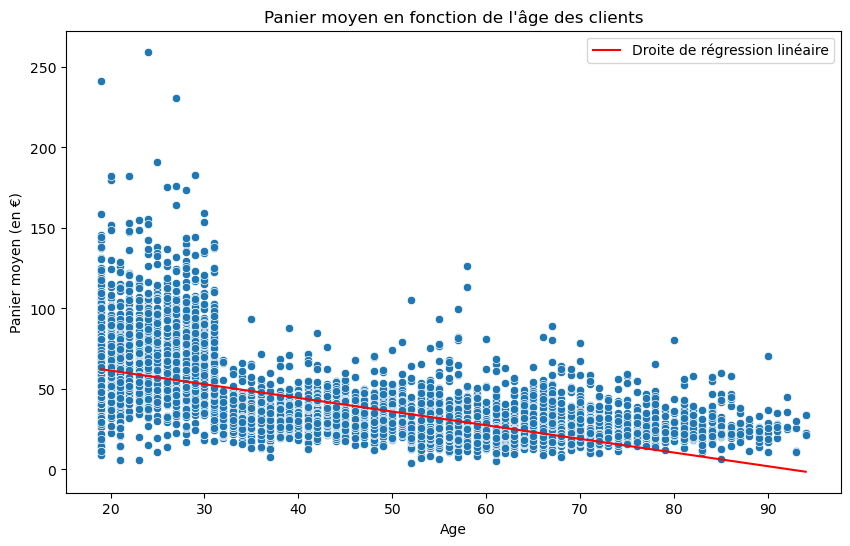

In [68]:
# Définition de l'équation de droite de régression

X=customers['age']
Y=customers['panier_moyen']

a = results.params[0]
b = results.params[1]
x = np.linspace(X.min(), X.max(), len(X))
y = a*x + b

# Visualisation du nuage de points et de la droite de régression

plt.figure(figsize=(10,6))

plt.ylabel("Panier moyen (en €)")
plt.xlabel('Age')
plt.title("Panier moyen en fonction de l'âge des clients")

sns.scatterplot(X, Y)
plt.plot(x, y, c='r', label='Droite de régression linéaire')

plt.legend()

plt.show()

**Voici la droite de régression linéaire du modèle**

In [69]:
# Normalité des résidus
st.shapiro(results.resid)

analyse_shapiro(echantillon=results.resid, alpha=0.05)

ANALYSE DU TEST DE NORMALITE DE SHAPIRO-WILK
----------------------------------------------------------------------------------------------------
H0 : L'échantillon suit une loi normale
H1 : L'échantillon ne suit pas une loi normale
alpha = 0.05
La pvalue est de 0.0
pvalue < alpha donc on rejette H0, l'échantillon ne suit pas une loi normale
----------------------------------------------------------------------------------------------------


#### Test non paramétrique de Spearman

In [70]:
st.spearmanr(customers['age'], customers['panier_moyen'])
analyse_spearmans (X=customers['age'], Y=customers['panier_moyen'], alpha=0.05)

ANALYSE DU TEST DE SPEARMAN
----------------------------------------------------------------------------------------------------
H0 : Il n'y a pas de corrélation entre les 2 variables 
H1 : Il y a une corrélation entre les 2 variables
alpha = 0.05
La pvalue est de 0.0
La coefficient de spearman est de -0.7011023439220372
pvalue < alpha donc on rejette H0, Il y a une corrélation entre les 2 variables
Il y a une corrélation négative de -70.11% comme l'indique le coefficient de Spearman
----------------------------------------------------------------------------------------------------


#### Conclusion

**D'un point de vu métier, le panier moyen baisse quand l'âge augmente.**

On peut distinguer 2 tranches d'âge concernant le panier moyen : 
- Les 19-32 ans, qui ont un panier moyen de 70.18€
- Les 32 ans et plus, qui ont un panier moyen de 29.71€ 

### 5. Lien entre l’âge des clients et les catégories des livres achetés

L'âge est une **variable quantitative et la catégorie est une variable qualitative.**

Nous allons donc effectuer le **test de l'ANOVA**.

L'analyse de variance (ANOVA) est une méthode statistique utilisée pour comparer la moyenne de trois groupes ou plus. Elle permet de déterminer si les différences entre les moyennes observées sont statistiquement significatives ou simplement le résultat du hasard.

In [71]:
# création d'un df pour chaque catégorie, pour les analyser indépendamment 
categ_0=customers.loc[customers['categ_0']!=0, ['client_id', 'age', 'categ_0']]
categ_1=customers.loc[customers['categ_1']!=0, ['client_id', 'age', 'categ_1']]
categ_2=customers.loc[customers['categ_2']!=0, ['client_id', 'age', 'categ_2']]

**Tentative de passage des tests de normalités pour les sous groupes -> échec**

**Tentative de passage d'égalité des variances pour les sous groupes -> échec**

#### Normalités des 3 sous groupes

In [72]:
st.shapiro(categ_0['age'])

ShapiroResult(statistic=0.9796735644340515, pvalue=4.244417696599513e-32)

In [73]:
st.shapiro(categ_1['age'])

ShapiroResult(statistic=0.9707438945770264, pvalue=2.7053933383345074e-38)

In [74]:
st.shapiro(categ_2['age'])

ShapiroResult(statistic=0.8596770167350769, pvalue=0.0)

Aucun des groupes par catégorie ne suit une distribution normal, un des prérequis de l'ANOVA n'est pas validé, on continue pour l'exercice.

#### Test d'égalité des variances

Test de Levene avec :

- H0 : Les variances des sous groupes sont égales
- H1 : Les variances des sous groupes sont différentes

alpha = 5%

In [75]:
st.levene(categ_0['age'], categ_1['age'], categ_2['age'])

LeveneResult(statistic=41.01507534560942, pvalue=1.6746060722753105e-18)

Les variances des sous groupes sont différentes, le 2ème prérequis de l'ANOVA n'est pas validé.

#### Test d'égalité des moyennes, test de l'Anova

Comparaison des moyennes de chaque sous groupe :

Nous effectuons le test de one_way ANOVA avec :

    H0 : Les moyennes des sous groupes sont égales
    H1 : Les moyennes des sous groupes sont différentes


In [76]:
st.f_oneway(categ_0['age'], categ_1['age'], categ_2['age'])

F_onewayResult(statistic=574.4575957876114, pvalue=2.7416118400332536e-243)

On rejette H0 donc on considère que les moyennes des sous groupes sont différentes.

#### Calcul de eta_squared

L'eta_squared est un indicateur sur l'effet de la variable indépendante (catégorie) sur la variable dépendante (âge).
Il indique la proportion de variance dans la variable dépendante qui est expliquée par la variable indépendante.

In [77]:
tab_tot=customers['age'].values
mean_age_tot=customers['age'].mean()
mean_age_categ_0=categ_0['age'].mean()
mean_age_categ_1=categ_1['age'].mean()
mean_age_categ_2=categ_2['age'].mean()

# Variation totale
SST = np.sum((tab_tot-mean_age_tot)**2)

# Variation interclasse
SCE = (mean_age_categ_0 - mean_age_tot)**2 + (mean_age_categ_1 - mean_age_tot)**2 + (mean_age_categ_2 - mean_age_tot)**2

# Eta_squared
eta_squared = SCE/SST
eta_squared

3.6664057087329635e-05

#### Test d'égalité des médiane, test de Kruskal-Wallis

Les prérequis de l'ANOVA n'ont pas été validé, donc on effectue le test non paramétrique de Kruskal-Wallis

Test de Kruskal-Wallis  avec :

- H0 : Les distributions des sous groupes sont égales
- H1 : Les distributions des sous groupes sont inégales

alpha=5%

In [78]:
st.kruskal(categ_0['age'], categ_1['age'], categ_2['age'])

KruskalResult(statistic=1250.0537254083356, pvalue=3.583294362312409e-272)

On rejette H0 donc on considère que les différences de distributions entre les groupes sont statistiquement significatives.

#### Conclusion de l'ANOVA

Le test de l'ANOVA indique que les inégalités de moyenne entre les groupes sont statistiquement significatives mais les prérequis n'étaient pas validés.

Le test non paramétrique de Kruskal-Wallis indique que les différences de distributions entre les groupes sont statistiquement significatives, donc que les variables catégorie et âge sont liées.

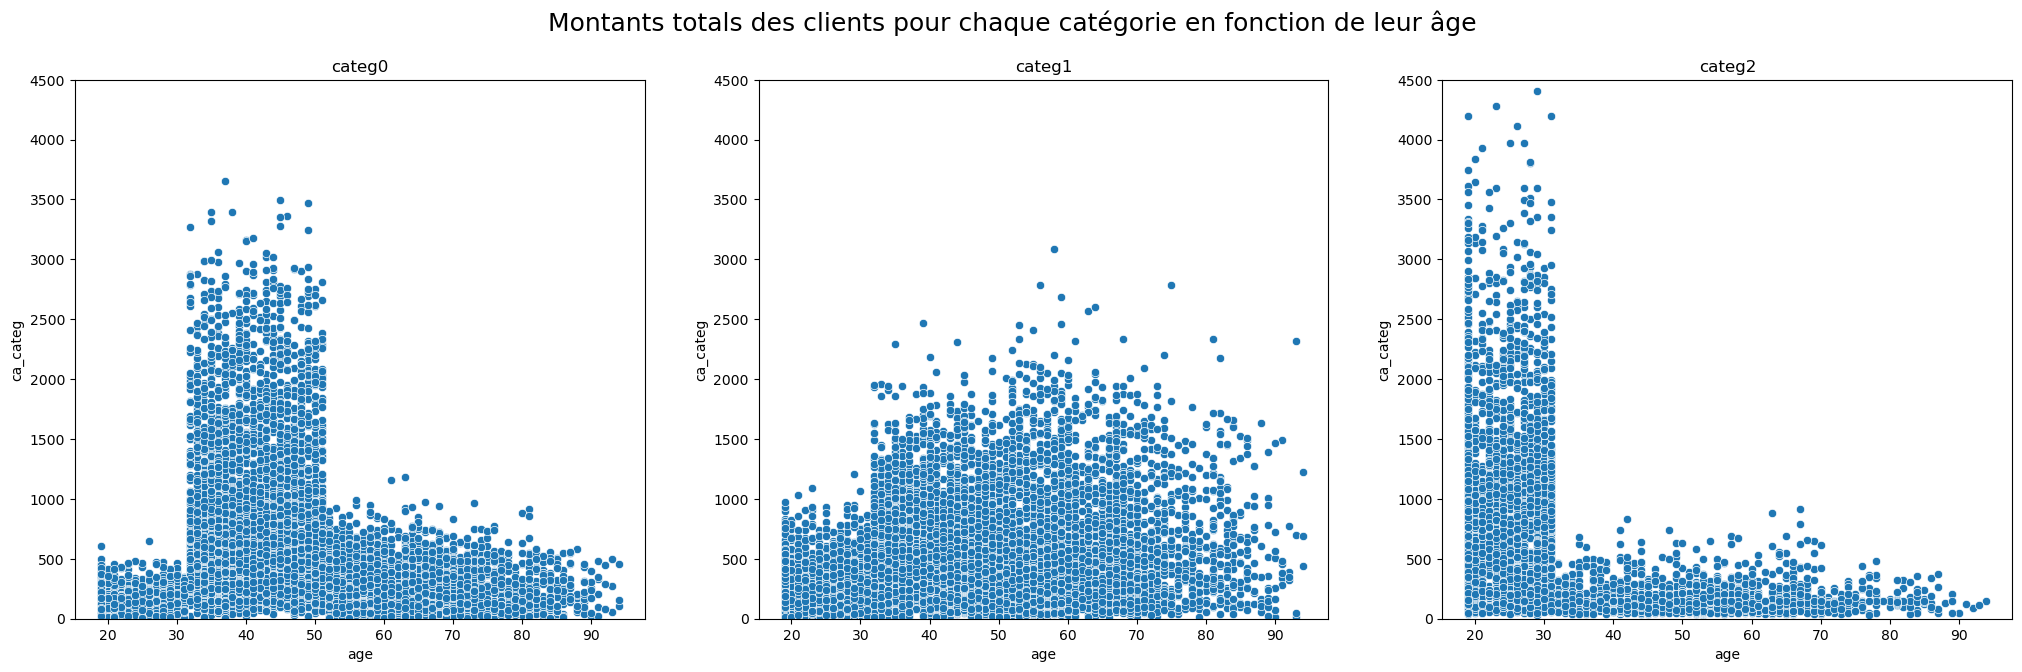

In [79]:
# création df pour chaque catégorie
# On ne prends pas en compte les 4 clients 'professionnels' dans cette analyse

ca_customers_categ = df2.groupby(['client_id', 'categ'])['price'].sum().reset_index()

customers_melt = pd.merge(customers_melt, ca_customers_categ, on=['client_id', 'categ'], how='left')
customers_melt.rename(columns={'price':'ca_categ'}, inplace=True)

customers_melt_zscore=customers_melt.loc[customers_melt['ventes_ca']<100000]

customers_categ0 = customers_melt_zscore.loc[customers_melt_zscore['categ']==0,:]
customers_categ1 = customers_melt_zscore.loc[customers_melt_zscore['categ']==1,:]
customers_categ2 = customers_melt_zscore.loc[customers_melt_zscore['categ']==2,:]

# visualisation montants totals des clients en fonction de leur âge pour chaque catégorie
plt.figure(figsize=(25,7))

plt.suptitle('Montants totals des clients pour chaque catégorie en fonction de leur âge', size=18)

plt.subplot(1,3,1)
plt.ylim(0,4500,500)
sns.scatterplot(data = customers_categ0, x='age', y='ca_categ')
plt.title('categ0')

plt.subplot(1,3,2)
plt.ylim(0,4500,500)
sns.scatterplot(data = customers_categ1, x='age', y='ca_categ')
plt.title('categ1')

plt.subplot(1,3,3)
plt.ylim(0,4500,500)
sns.scatterplot(data = customers_categ2, x='age', y='ca_categ')
plt.title('categ2');

**Ces graphiques montrent comment les variables catégorie et âge sont liées.**

Ces graphiques montrent que dans chaque catégorie, une tranche d'âge s'impose et que donc les variables sont liées.

Chaque tranche d'âge à une catégorie de prédilection :
- Les 19-32 ans : la catégorie 2 (75% des du CA des 19-32 ans concernent l'achat de livres de la catégorie 2)
- Les 32-52 ans : la catégorie 0 (61% des du CA des 32-52 ans concernent l'achat de livres de la catégorie 0)
- Les 52 ans et plus : la catégorie 1 (68% des du CA des 52 ans et plus concernent l'achat de livres de la catégorie 1)